# PROYECTO DE CLASIFICACIÓN TESCC.
# PREDICCIÓN DE LLUVIA EL DÍA SIGUIENTE EN AUSTRALIA.
### Elisa Batista Blanco 
### John Jairo Ballestas Payares
### Jorge Martin Villafruela


## Librerias
#### versión de Python 3.12.7

In [114]:

import pandas as pd
from pandas import read_csv
from numpy import array
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pathlib import Path
import seaborn as sns
import numpy as np 
import missingno as miss
from IPython.display import display
import missingno as msno

# Carga y Preparación Inicial del conjunto de datos: WeatherAUS


In [115]:
file_path =Path().cwd()/"weatherAUS.csv"
dfweatherAUS = pd.read_csv(file_path)
dfweatherAUS['Date'] = pd.to_datetime(dfweatherAUS['Date']).dt.date



In [116]:
print("Estructura del DataFrame:")
print(dfweatherAUS.info())

Estructura del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Clo

In [38]:
print("\nPrimeras 10 filas del DataFrame:")
display(dfweatherAUS.head(10))


Primeras 10 filas del DataFrame:


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   
5         WNW           56.0          W  ...        55.0         23.0   
6           W           50.0         SW  ...        49.0         19.0   
7           W           35.0        SSE  ...        48.0         19.0   
8         NNW           80.0         SE  ...        42.0          9.0   
9           W           28.0          S  ...        58.0         27.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
5       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
6       1009.6       1008.2       1.0       NaN     18.1     24.6         No   
7       1013.4       1010.1       NaN       NaN     16.3     25.5         No   
8       1008.9       1003.6       NaN       NaN     18.3     30.2         No   
9       1007.0       1005.7       NaN       NaN     20.1     28.2        Yes   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 23 columns]

### Descripción de la clase: etiquetas de clase y su distribución en % 

In [37]:
# Contar registros por clase
conteo = dfweatherAUS['RainTomorrow'].value_counts()

# Distribución porcentual
porcentaje = dfweatherAUS['RainTomorrow'].value_counts(normalize=True) * 100

print("Conteo por clase:\n", conteo)
print("\nDistribución porcentual:\n", porcentaje)


Conteo por clase:
 RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Distribución porcentual:
 RainTomorrow
No     77.581878
Yes    22.418122
Name: proportion, dtype: float64


In [39]:
# Calcula el número total de registros en el DataFrame dfweatherAUS
total_records = len(dfweatherAUS)

# Imprime la cantidad de registros antes de realizar cualquier limpieza de datos
print(f"\nNúmero de registros del DataFrame sin limpiar: {total_records}") 


Número de registros del DataFrame sin limpiar: 145460


In [40]:
# Calcula el número total de registros duplicados en el DataFrame dfweatherAUS
num_duplicates = dfweatherAUS.duplicated().sum()

# Imprime la cantidad de registros que están duplicados
print(f"Número de registros duplicados: {num_duplicates}")

Número de registros duplicados: 0


# Análisis de registros completos y registros con valores nulos

In [41]:
# Contar los registros que no tienen valores nulos en ninguna columna
no_null_records = (dfweatherAUS.notnull().sum(axis=1) == dfweatherAUS.shape[1]).sum()
print(f"Número de registros del DataFrame sin valores Null ni NaN: {no_null_records}")

# Número de registros que contienen valores nulos
num_null_records = total_records - no_null_records
print(f"Número de registros con al menos un valor nulo: {num_null_records}")


Número de registros del DataFrame sin valores Null ni NaN: 56420
Número de registros con al menos un valor nulo: 89040


In [117]:

# Crear un DataFrame con los valores únicos y una muestra de esos valores por cada columna
# Se crea un nuevo DataFrame llamado 'distinct_values_df' que contendrá información
# resumida sobre cada columna del DataFrame original 'dfweatherAUS'.

distinct_values_df = pd.DataFrame({
     # Columna: nombre de cada columna del DataFrame original
    "Columna": dfweatherAUS.columns,
    # Valores Únicos: número total de valores distintos (sin contar NaN) en cada columna
    "Valores Únicos": [dfweatherAUS[col].nunique() for col in dfweatherAUS.columns],

    # Lista de Valores Distintos: muestra los primeros dos valores únicos (excluyendo NaN)
    # para tener una idea del tipo de datos que contiene cada columna.
    "Lista de Valores Distintos": [dfweatherAUS[col].dropna().unique()[:2].tolist() for col in dfweatherAUS.columns]
})

# Mostrar el nuevo DataFrame con el resumen
print(distinct_values_df)


          Columna  Valores Únicos Lista de Valores Distintos
0            Date            3436   [2008-12-01, 2008-12-02]
1        Location              49    [Albury, BadgerysCreek]
2         MinTemp             389                [13.4, 7.4]
3         MaxTemp             505               [22.9, 25.1]
4        Rainfall             681                 [0.6, 0.0]
5     Evaporation             358               [12.0, 14.8]
6        Sunshine             145               [12.3, 13.0]
7     WindGustDir              16                   [W, WNW]
8   WindGustSpeed              67               [44.0, 46.0]
9      WindDir9am              16                   [W, NNW]
10     WindDir3pm              16                 [WNW, WSW]
11   WindSpeed9am              43                [20.0, 4.0]
12   WindSpeed3pm              44               [24.0, 22.0]
13    Humidity9am             101               [71.0, 44.0]
14    Humidity3pm             101               [22.0, 25.0]
15    Pressure9am       

In [118]:
# Crear copia del DataFrame
dfDays = dfweatherAUS.copy()

dfDays.insert(1, 'year', dfDays['Date'].apply(lambda x: x.year))
dfDays.insert(2, 'month', dfDays['Date'].apply(lambda x: x.month))
dfDays.insert(3, 'day', dfDays['Date'].apply(lambda x: x.day))

### Análisis de valores nulos y desglose de fechas (Año, Mes, Día)

In [119]:
#Ver null (NA)
# Calcular cuántos valores faltantes (NaN) hay en cada columna del DataFrame 'dfDays'
missing_values = dfDays.isna().sum()

# Calcular el porcentaje de valores faltantes respecto al total de filas del DataFrame.
# Se multiplica por 100 para obtener el porcentaje y se redondea a 2 decimales.

missing_percentage = ((missing_values / len(dfDays)) * 100).round(2)

missing_data_df = pd.DataFrame({
    "Columna": dfDays.columns,
    "Valores NaN": missing_values.values,
    "Porcentaje NaN": missing_percentage.values
})

# Mostrar el resumen con los valores faltantes por columna
print(missing_data_df)


          Columna  Valores NaN  Porcentaje NaN
0            Date            0            0.00
1            year            0            0.00
2           month            0            0.00
3             day            0            0.00
4        Location            0            0.00
5         MinTemp         1485            1.02
6         MaxTemp         1261            0.87
7        Rainfall         3261            2.24
8     Evaporation        62790           43.17
9        Sunshine        69835           48.01
10    WindGustDir        10326            7.10
11  WindGustSpeed        10263            7.06
12     WindDir9am        10566            7.26
13     WindDir3pm         4228            2.91
14   WindSpeed9am         1767            1.21
15   WindSpeed3pm         3062            2.11
16    Humidity9am         2654            1.82
17    Humidity3pm         4507            3.10
18    Pressure9am        15065           10.36
19    Pressure3pm        15028           10.33
20       Clou

# Resumen por tipo de gráfico y variables

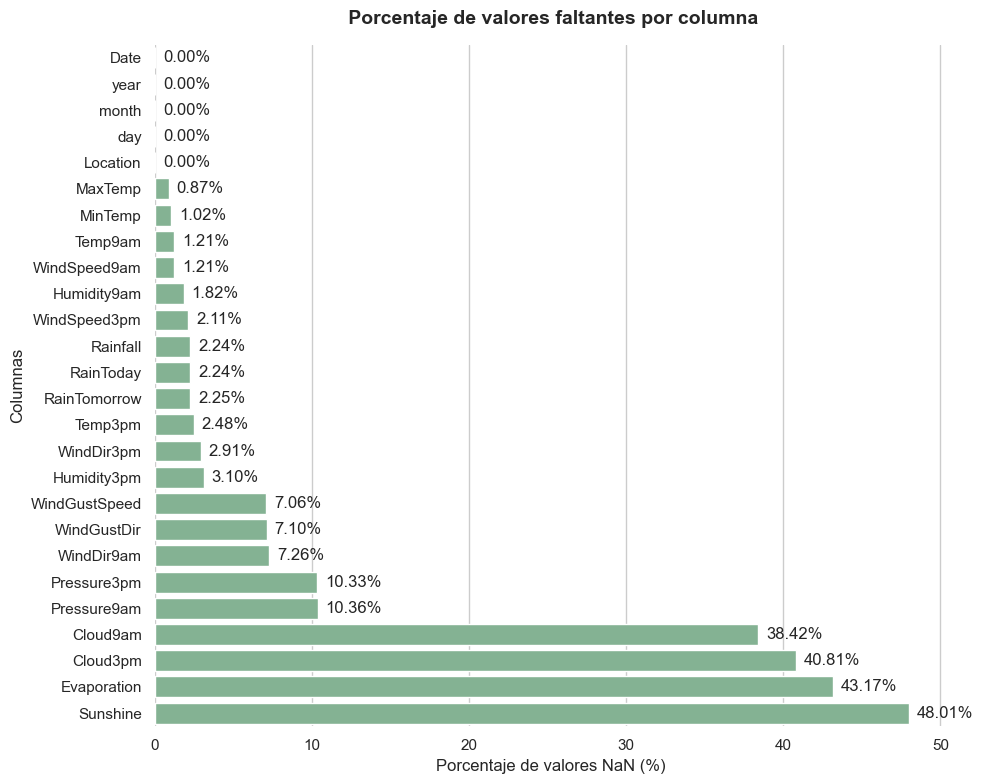

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar las columnas por porcentaje de NaN (de mayor a menor)
missing_sorted = missing_data_df.sort_values(by='Porcentaje NaN', ascending=True)

# Estilo visual
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.set_palette("crest")  # Paleta de tonos suaves

# Crear gráfico de barras horizontales
barplot = sns.barplot(
    x='Porcentaje NaN',
    y='Columna',
    data=missing_sorted
)

# Etiquetas de datos (porcentajes al final de cada barra)
for index, value in enumerate(missing_sorted['Porcentaje NaN']):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

# Títulos y etiquetas
plt.title(' Porcentaje de valores faltantes por columna', fontsize=14, weight='bold', pad=15)
plt.xlabel('Porcentaje de valores NaN (%)')
plt.ylabel('Columnas')

# Eliminar bordes superiores y derechos
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


# Distribución de valores faltantes: Matriz

<Figure size 1200x600 with 0 Axes>

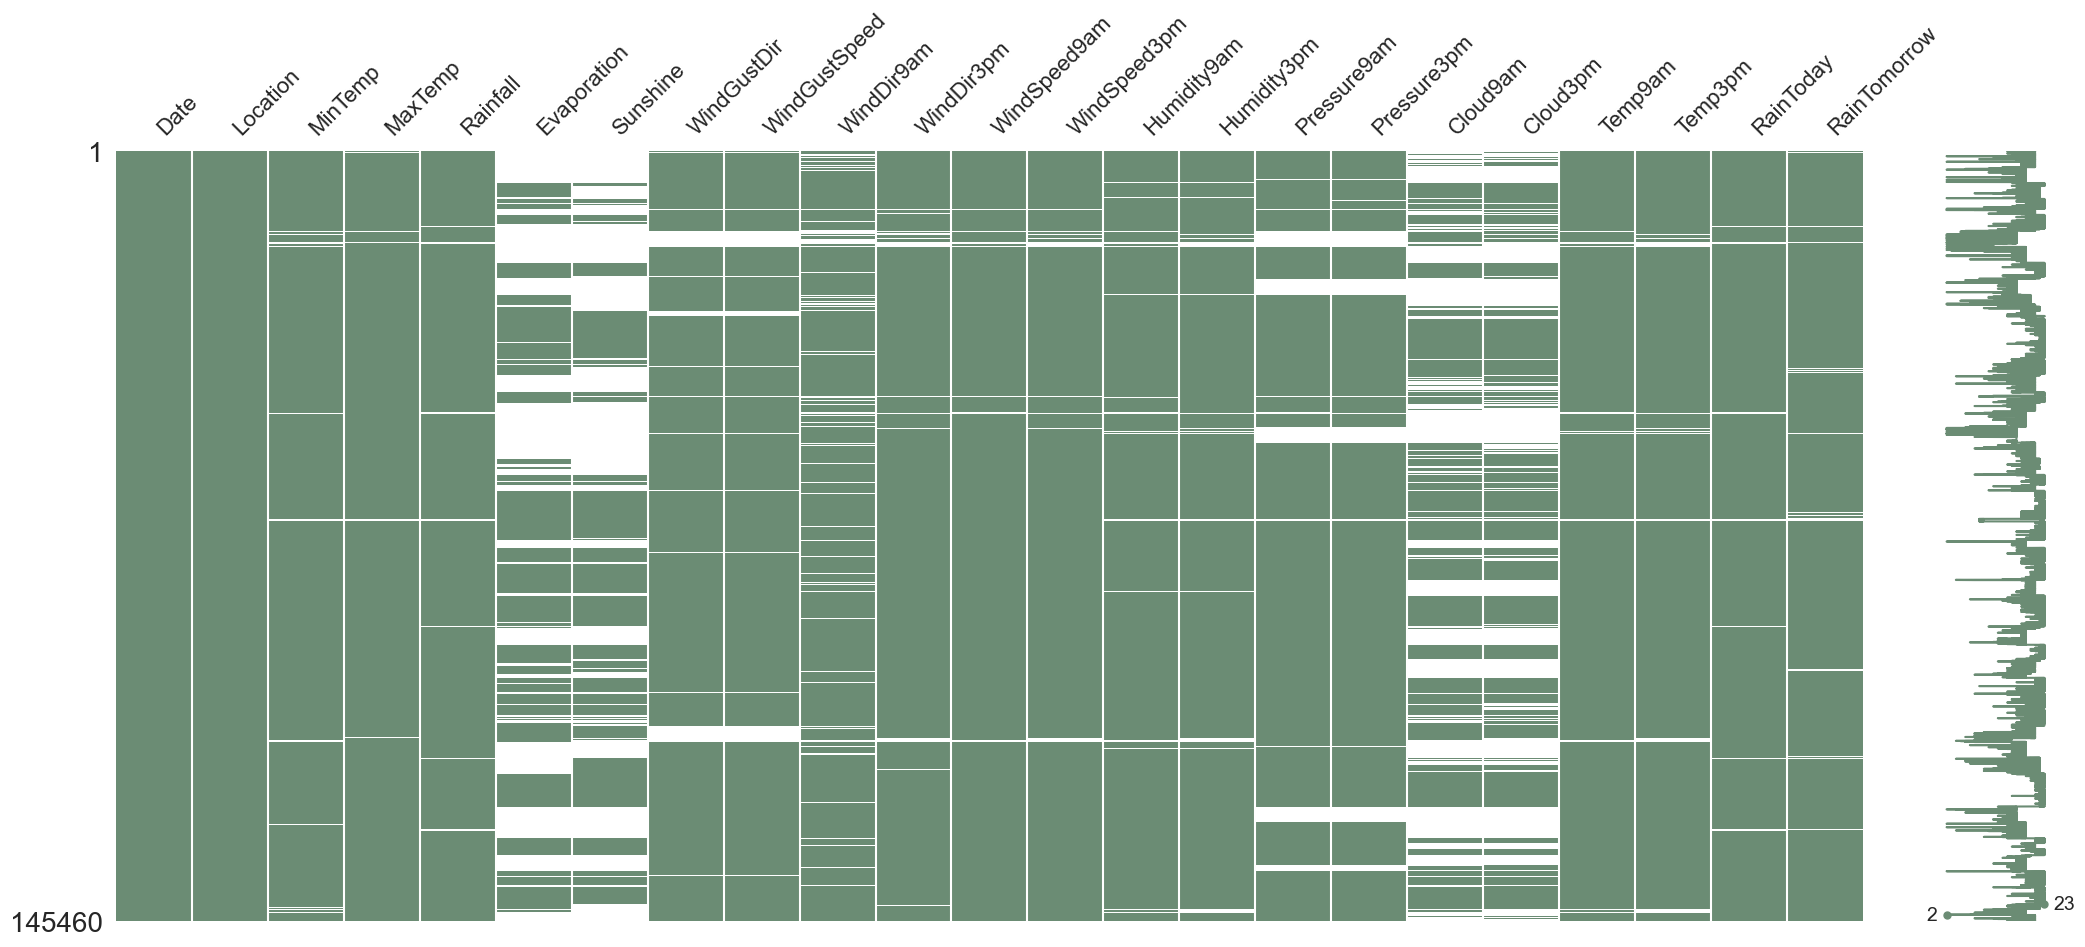

In [121]:

import missingno as msno
import matplotlib.pyplot as plt

# Color verde en formato RGB normalizado (0-1)
green_rgb = (107/255, 140/255, 116/255)

# Mapa de calor de valores faltantes con color verde
plt.figure(figsize=(12,6))
msno.matrix(dfweatherAUS, color=green_rgb)
plt.show()





# Porcentaje de valores NA más comunes en el conjunto de datos.

In [122]:
# Mostrar un encabezado descriptivo en la salida de la consola
print("Porcentaje de valores NA mas comunes")

        # Filtrar el DataFrame 'missing_data_df' para mostrar únicamente las columnas seleccionadas
# Se utiliza .str.strip() para eliminar posibles espacios en blanco en los nombres de las columnas
# y .isin([...]) para conservar solo las columnas especificadas en la lista.
filtered_missing_data = missing_data_df[
    missing_data_df["Columna"].str.strip().isin(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"])
]

# Mostrar el resultado filtrado, que contiene el porcentaje de valores faltantes
# en las columnas con mayor cantidad de datos ausentes

print(filtered_missing_data)


Porcentaje de valores NA mas comunes
        Columna  Valores NaN  Porcentaje NaN
8   Evaporation        62790           43.17
9      Sunshine        69835           48.01
20     Cloud9am        55888           38.42
21     Cloud3pm        59358           40.81


## Visualización de la correlación entre variables con valores nulos en el conjunto de datos.

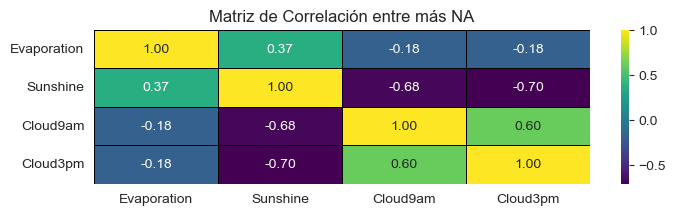

In [47]:
# Se seleccionan las columnas del DataFrame 'dfweatherAUS' que presentan más valores nulos:
# 'Evaporation', 'Sunshine', 'Cloud9am' y 'Cloud3pm'.
# Luego se calcula la matriz de correlación entre ellas.

corr_matrix_nulos = dfweatherAUS[["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"]].corr()

# Se define el tamaño de la figura del gráfico (8 de ancho por 2 de alto).
plt.figure(figsize=(8, 2))

# Crear un mapa de calor usando la paleta 'viridis'
sns.heatmap(corr_matrix_nulos, annot=True, fmt=".2f", cmap="viridis", cbar=True, linewidths=0.5, linecolor='black')

#sns.heatmap(corr_matrix_nulos, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Se agrega un título al gráfico para describir su contenido.
plt.title("Matriz de Correlación entre más NA")


# Se muestra el gráfico en pantalla.
plt.show()


# Matriz de Correlación con variable Objetiva: RainTomorrow

C:\Users\Wander Peralta\AppData\Local\Temp\ipykernel_51804\1892277228.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_correlacion['RainTomorrow'].replace("NA", np.nan, inplace=True)


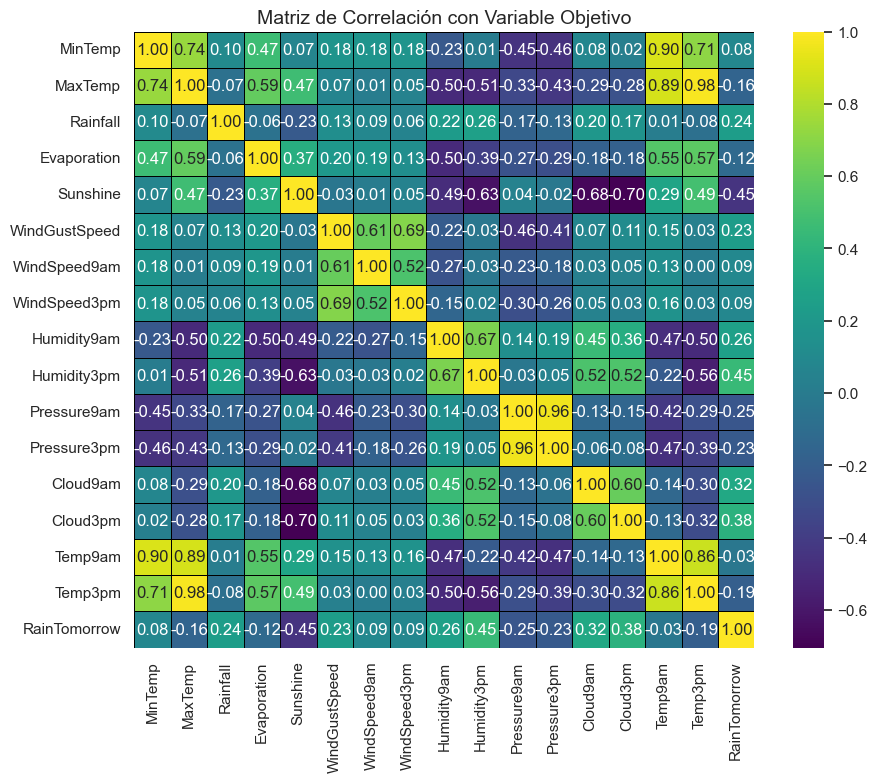

In [123]:
# Copia del DataFrame original
df_correlacion = dfweatherAUS.copy()

# Reemplazo de valores "NA" por NaN y mapeo de la variable objetivo
df_correlacion['RainTomorrow'].replace("NA", np.nan, inplace=True)
df_correlacion['RainTomorrow'] = df_correlacion['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Cálculo de la matriz de correlación solo con variables numéricas
correlation_matrix = df_correlacion.select_dtypes(exclude=['object']).corr()

# Visualización de la matriz de correlación con colores pastel
plt.figure(figsize=(10, 8))

# Crear un mapa de calor usando la paleta 'viridis'
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True, linewidths=0.5, linecolor='black')

# Título del gráfico
plt.title("Matriz de Correlación con Variable Objetivo", fontsize=14)
plt.show()


# Matriz de Correlación entre numericas

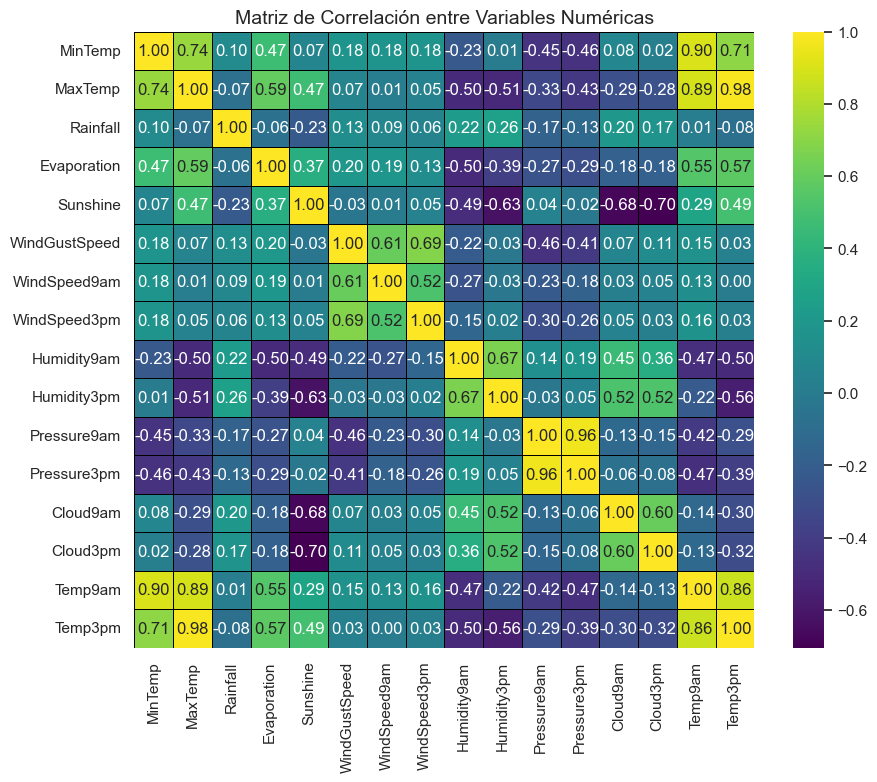

In [124]:
# Crear una copia del DataFrame original para evitar modificar los datos base
df_correlacion  = dfweatherAUS.copy()

# Calcular la matriz de correlación considerando solo las columnas numéricas
correlation_matrix = df_correlacion.select_dtypes(exclude=['object']).corr()

# Definir el tamaño de la figura para una visualización más clara
plt.figure(figsize=(10, 8))

# Crear un mapa de calor usando la paleta 'viridis'
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True, linewidths=0.5, linecolor='black')

# Agregar un título descriptivo al gráfico
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=14)
# Mostrar el gráfico resultante
plt.show()

# Matriz de Correlación de variables de temperatura.

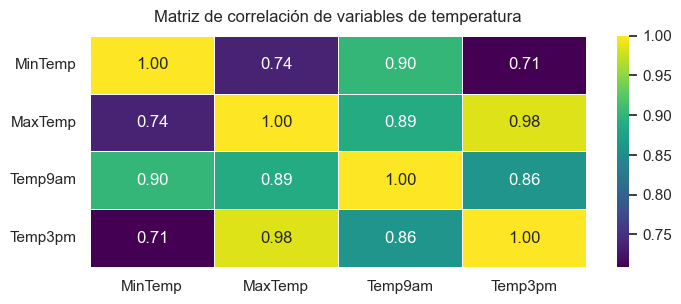

In [125]:
# Se seleccionan las variables de temperatura del DataFrame 'dfweatherAUS'
# para analizar qué tan relacionadas están entre sí.
# Esto puede ayudar a detectar variables redundantes o fuertemente dependientes.
matriz_correlacion_temp = dfweatherAUS[["MinTemp", "MaxTemp", "Temp9am", "Temp3pm"]].corr()

# Se define el tamaño del gráfico para que los textos y valores sean legibles.
plt.figure(figsize=(8, 3))

# Se genera el mapa de calor utilizando la paleta de colores 'viridis',

sns.heatmap(matriz_correlacion_temp, annot=True, fmt=".2f", cmap="viridis",
            cbar=True, linewidths=0.5, linecolor='white')

# Se coloca un título descriptivo en la parte superior del gráfico.
plt.title("Matriz de correlación de variables de temperatura", fontsize=12, pad=10)

# Se muestra el gráfico.
plt.show()


# Matriz de correlación entre variables de velocidad del viento.

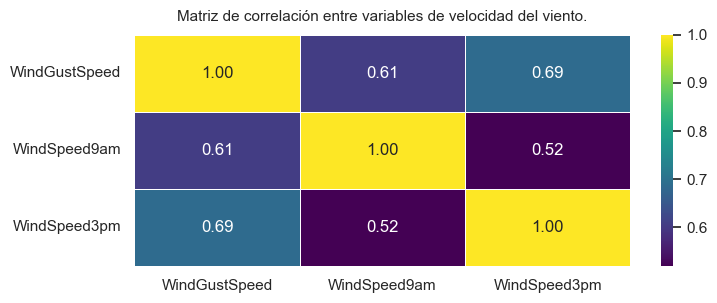

In [126]:
# Se seleccionan las columnas del DataFrame 'dfweatherAUS' relacionadas con la velocidad del viento.
# Estas incluyen la ráfaga máxima y las velocidades registradas en la mañana y en la tarde.
# El objetivo es observar si existe una relación fuerte entre estas mediciones.
matriz_corr_viento = dfweatherAUS[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]].corr()

# Se define el tamaño del gráfico para lograr una visualización clara y proporcionada.
plt.figure(figsize=(8, 3))

# Se crea el mapa de calor con la función heatmap de seaborn.

sns.heatmap(matriz_corr_viento, annot=True, fmt=".2f", cmap="viridis",
            cbar=True, linewidths=0.5, linecolor='white')

# Se agrega un título descriptivo al gráfico.
plt.title("Matriz de correlación entre variables de velocidad del viento.",
          fontsize=11, pad=10)

# se muestra la figura en pantalla.
plt.show()


# Análisis de datos numéricos

Clasificación de variables según su tipo de dato.

In [127]:
# Definición de tipos de variables para análisis y visualización

# Variables numéricas continuas: admiten valores decimales
vars_continuas = [
    "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
    "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"
]

# Variables numéricas discretas: toman valores enteros
vars_discretas = [
    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",
    "Humidity9am", "Humidity3pm"
]

# Agrupar todas las variables numéricas
campos_numericos = vars_continuas + vars_discretas

# Variables categóricas: clasificadas por tipo
campos_nominales = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm"]
campos_ordinales = ["Cloud9am", "Cloud3pm", "month", "day", "year"]
campos_binarios  = ["RainToday"]

# Unión de todas las variables categóricas
campos_categoricos = campos_nominales + campos_ordinales + campos_binarios

# Variable objetivo (target) para el modelo predictivo
variable_objetivo = ["RainTomorrow"]


In [129]:
# Mostrar en pantalla el encabezado.
print("Porcentaje de datos faltantes en variables numéricas")

# Filtrar el DataFrame para obtener solo las columnas numéricas
datos_faltantes_numericos = missing_data_df[
    missing_data_df["Columna"].str.strip().isin(campos_numericos)
]

# Imprimir el resultado del filtrado
print(datos_faltantes_numericos)


Porcentaje de datos faltantes en variables numéricas
          Columna  Valores NaN  Porcentaje NaN
5         MinTemp         1485            1.02
6         MaxTemp         1261            0.87
7        Rainfall         3261            2.24
8     Evaporation        62790           43.17
9        Sunshine        69835           48.01
11  WindGustSpeed        10263            7.06
14   WindSpeed9am         1767            1.21
15   WindSpeed3pm         3062            2.11
16    Humidity9am         2654            1.82
17    Humidity3pm         4507            3.10
18    Pressure9am        15065           10.36
19    Pressure3pm        15028           10.33
22        Temp9am         1767            1.21
23        Temp3pm         3609            2.48


Cálculo de medidas estadísticas en variables numéricas

In [130]:
# Calcular la moda, mediana y media para cada columna numérica
estadisticas_numericas = {
    "Columna": campos_numericos,
    "Moda": [
        dfDays[col].mode().iloc[0] if col in dfDays.columns and not dfDays[col].mode().empty 
        else "N/A" 
        for col in campos_numericos
    ],
    "Mediana": [
        round(dfDays[col].median(), 2) if col in dfDays.columns and not dfDays[col].isnull().all() 
        else "N/A" 
        for col in campos_numericos
    ],
    "Media": [
        round(dfDays[col].mean(), 2) if col in dfDays.columns and not dfDays[col].isnull().all() 
        else "N/A" 
        for col in campos_numericos
    ]
}

# Convertir el diccionario a un DataFrame
estadisticas_df = pd.DataFrame(estadisticas_numericas)

# Mostrar el resultado
print("Medidas estadísticas de las variables numéricas")
print(estadisticas_df)


Medidas estadísticas de las variables numéricas
          Columna    Moda  Mediana    Media
0         MinTemp    11.0     12.0    12.19
1         MaxTemp    20.0     22.6    23.22
2        Rainfall     0.0      0.0     2.36
3     Evaporation     4.0      4.8     5.47
4        Sunshine     0.0      8.4     7.61
5     Pressure9am  1016.4   1017.6  1017.65
6     Pressure3pm  1015.3   1015.2  1015.26
7         Temp9am    17.0     16.7    16.99
8         Temp3pm    20.0     21.1    21.68
9   WindGustSpeed    35.0     39.0    40.04
10   WindSpeed9am     9.0     13.0    14.04
11   WindSpeed3pm    13.0     19.0    18.66
12    Humidity9am    99.0     70.0    68.88
13    Humidity3pm    52.0     52.0    51.54


In [63]:
# Verificar qué columnas numéricas existen realmente en el DataFrame
campos_numericos_existentes = [col for col in campos_numericos if col in dfDays.columns]

# Mostrar un encabezado informativo
print("Estadísticas descriptivas de las variables numéricas presentes en el conjunto de datos:")

# Calcular y mostrar las estadísticas básicas (media, desviación, mínimos, máximos, etc.)
dfDays[campos_numericos_existentes].describe().round(2)


Estadísticas descriptivas de las variables numéricas presentes en el conjunto de datos:


MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  Pressure9am  \
count  143975.00  144199.00  142199.00     82670.00  75625.00    130395.00   
mean       12.19      23.22       2.36         5.47      7.61      1017.65   
std         6.40       7.12       8.48         4.19      3.79         7.11   
min        -8.50      -4.80       0.00         0.00      0.00       980.50   
25%         7.60      17.90       0.00         2.60      4.80      1012.90   
50%        12.00      22.60       0.00         4.80      8.40      1017.60   
75%        16.90      28.20       0.80         7.40     10.60      1022.40   
max        33.90      48.10     371.00       145.00     14.50      1041.00   

       Pressure3pm    Temp9am    Temp3pm  WindGustSpeed  WindSpeed9am  \
count    130432.00  143693.00  141851.00      135197.00     143693.00   
mean       1015.26      16.99      21.68          40.04         14.04   
std           7.04       6.49       6.94          13.61          8.92   
min         977.10      -7.20      -5.40           6.00          0.00   
25%        1010.40      12.30      16.60          31.00          7.00   
50%        1015.20      16.70      21.10          39.00         13.00   
75%        1020.00      21.60      26.40          48.00         19.00   
max        1039.60      40.20      46.70         135.00        130.00   

       WindSpeed3pm  Humidity9am  Humidity3pm  
count     142398.00    142806.00    140953.00  
mean          18.66        68.88        51.54  
std            8.81        19.03        20.80  
min            0.00         0.00         0.00  
25%           13.00        57.00        37.00  
50%           19.00        70.00        52.00  
75%           24.00        83.00        66.00  
max           87.00       100.00       100.00

Detección de valores fuera de rango en variables numéricas.

In [64]:
#  Crear una estructura para almacenar los resultados
valores_fuera_rango = {
    "Columna": [],
    "Valores Fuera de Rango": []
}

# Recorrer cada campo numérico y verificar posibles valores anómalos
for campo in campos_numericos:
    fuera_rango = 0

    # Temperaturas fuera del rango lógico (-50 a 60 °C)
    if campo in ["Temp9am", "Temp3pm"]:
        fuera_rango = dfDays[(dfDays[campo] < -50) | (dfDays[campo] > 60)].shape[0]

    # Lluvia o evaporación negativas (no posibles)
    elif campo in ["Rainfall", "Evaporation"]:
        fuera_rango = dfDays[dfDays[campo] < 0].shape[0]

    # Horas de sol fuera del rango 0–24
    elif campo == "Sunshine":
        fuera_rango = dfDays[(dfDays[campo] < 0) | (dfDays[campo] > 24)].shape[0]

    # Humedad fuera del rango 0–100%
    elif campo in ["Humidity9am", "Humidity3pm"]:
        fuera_rango = dfDays[(dfDays[campo] < 0) | (dfDays[campo] > 100)].shape[0]

    # Velocidades del viento negativas
    elif campo in ["WindSpeed9am", "WindSpeed3pm", "WindGustSpeed"]:
        fuera_rango = dfDays[dfDays[campo] < 0].shape[0]

    # Guardar los resultados en el diccionario
    valores_fuera_rango["Columna"].append(campo)
    valores_fuera_rango["Valores Fuera de Rango"].append(fuera_rango)

# Convertir los resultados en un DataFrame
valores_fuera_rango_df = pd.DataFrame(valores_fuera_rango)

# Mostrar los valores fuera de rango detectados
print(" Valores fuera de rango detectados en variables numéricas")
print(valores_fuera_rango_df)


 Valores fuera de rango detectados en variables numéricas
          Columna  Valores Fuera de Rango
0         MinTemp                       0
1         MaxTemp                       0
2        Rainfall                       0
3     Evaporation                       0
4        Sunshine                       0
5     Pressure9am                       0
6     Pressure3pm                       0
7         Temp9am                       0
8         Temp3pm                       0
9   WindGustSpeed                       0
10   WindSpeed9am                       0
11   WindSpeed3pm                       0
12    Humidity9am                       0
13    Humidity3pm                       0


### Distribución de frecuencias en variables numéricas.

In [65]:
# Recorrer cada campo numérico existente en el DataFrame
for campo in campos_numericos_existentes:
    # Calcular el porcentaje de aparición de cada valor
    frecuencias = dfDays[campo].value_counts(normalize=True) * 100  
    
    # Crear un DataFrame con los valores únicos, frecuencia y porcentaje
    distribucion_df = pd.DataFrame({
        "Valor Único": frecuencias.index,
        "Frecuencia": dfDays[campo].value_counts().values,
        "Porcentaje (%)": frecuencias.values.round(2)
    })

    # Mostrar la distribución correspondiente a cada variable
    print(f"\nDistribución de la variable: {campo}")
    display(distribucion_df)



Distribución de la variable: MinTemp


Valor Único  Frecuencia  Porcentaje (%)
0           11.0         899            0.62
1           10.2         898            0.62
2            9.6         896            0.62
3           10.5         884            0.61
4            9.0         872            0.61
..           ...         ...             ...
384         30.5           1            0.00
385         -7.3           1            0.00
386         -7.8           1            0.00
387         -7.2           1            0.00
388         30.2           1            0.00

[389 rows x 3 columns]


Distribución de la variable: MaxTemp


Valor Único  Frecuencia  Porcentaje (%)
0           20.0         885            0.61
1           19.0         843            0.58
2           19.8         840            0.58
3           20.4         834            0.58
4           19.9         823            0.57
..           ...         ...             ...
500         46.5           1            0.00
501         46.9           1            0.00
502         47.0           1            0.00
503         46.6           1            0.00
504         -2.4           1            0.00

[505 rows x 3 columns]


Distribución de la variable: Rainfall


Valor Único  Frecuencia  Porcentaje (%)
0            0.0       91080           64.05
1            0.2        8761            6.16
2            0.4        3782            2.66
3            0.6        2592            1.82
4            0.8        2056            1.45
..           ...         ...             ...
676        134.8           1            0.00
677         84.4           1            0.00
678        157.6           1            0.00
679        166.8           1            0.00
680         69.0           1            0.00

[681 rows x 3 columns]


Distribución de la variable: Evaporation


Valor Único  Frecuencia  Porcentaje (%)
0            4.0        3339            4.04
1            8.0        2609            3.16
2            2.2        2095            2.53
3            2.0        2032            2.46
4            2.4        2003            2.42
..           ...         ...             ...
353         17.1           1            0.00
354         19.7           1            0.00
355         20.5           1            0.00
356         18.1           1            0.00
357         39.6           1            0.00

[358 rows x 3 columns]


Distribución de la variable: Sunshine


Valor Único  Frecuencia  Porcentaje (%)
0            0.0        2359            3.12
1           10.7        1101            1.46
2           11.0        1094            1.45
3           10.8        1069            1.41
4           10.5        1027            1.36
..           ...         ...             ...
140         14.0          15            0.02
141         14.1           6            0.01
142         14.3           4            0.01
143         14.2           2            0.00
144         14.5           1            0.00

[145 rows x 3 columns]


Distribución de la variable: Pressure9am


Valor Único  Frecuencia  Porcentaje (%)
0         1016.4         816            0.63
1         1017.9         789            0.61
2         1016.3         775            0.59
3         1018.7         775            0.59
4         1018.0         769            0.59
..           ...         ...             ...
541        982.3           1            0.00
542        989.0           1            0.00
543       1041.0           1            0.00
544        985.1           1            0.00
545        990.6           1            0.00

[546 rows x 3 columns]


Distribución de la variable: Pressure3pm


Valor Único  Frecuencia  Porcentaje (%)
0       1015.300         786            0.60
1       1015.500         783            0.60
2       1015.600         776            0.59
3       1015.700         773            0.59
4       1013.500         767            0.59
..           ...         ...             ...
544     1037.200           1            0.00
545     1037.600           1            0.00
546      987.600           1            0.00
547     1009.555           1            0.00
548      989.500           1            0.00

[549 rows x 3 columns]


Distribución de la variable: Temp9am


Valor Único  Frecuencia  Porcentaje (%)
0           17.0         912            0.63
1           13.8         900            0.63
2           14.8         894            0.62
3           16.0         882            0.61
4           14.0         876            0.61
..           ...         ...             ...
436         -7.2           1            0.00
437         -7.0           1            0.00
438         -3.5           1            0.00
439         -6.2           1            0.00
440         38.0           1            0.00

[441 rows x 3 columns]


Distribución de la variable: Temp3pm


Valor Único  Frecuencia  Porcentaje (%)
0           20.0         882            0.62
1           19.0         869            0.61
2           18.5         869            0.61
3           18.4         868            0.61
4           17.8         859            0.61
..           ...         ...             ...
497         46.2           1            0.00
498         -3.4           1            0.00
499         -4.1           1            0.00
500         46.7           1            0.00
501         45.0           1            0.00

[502 rows x 3 columns]


Distribución de la variable: WindGustSpeed


Valor Único  Frecuencia  Porcentaje (%)
0          35.0        9215            6.82
1          39.0        8794            6.50
2          31.0        8428            6.23
3          37.0        8047            5.95
4          33.0        7933            5.87
..          ...         ...             ...
62        122.0           3            0.00
63        126.0           2            0.00
64        124.0           2            0.00
65        130.0           1            0.00
66          6.0           1            0.00

[67 rows x 3 columns]


Distribución de la variable: WindSpeed9am


Valor Único  Frecuencia  Porcentaje (%)
0           9.0       13649            9.50
1          13.0       13132            9.14
2          11.0       11728            8.16
3          17.0       10788            7.51
4           7.0       10783            7.50
5          15.0       10625            7.39
6           6.0        9118            6.35
7          19.0        8763            6.10
8           0.0        8745            6.09
9          20.0        8063            5.61
10          4.0        6360            4.43
11         22.0        5672            3.95
12         24.0        5450            3.79
13          2.0        4609            3.21
14         26.0        3766            2.62
15         28.0        3568            2.48
16         30.0        2336            1.63
17         31.0        2025            1.41
18         33.0        1130            0.79
19         35.0         977            0.68
20         37.0         589            0.41
21         39.0         455            0.32
22         41.0         326            0.23
23         43.0         272            0.19
24         44.0         197            0.14
25         46.0         175            0.12
26         50.0          88            0.06
27         48.0          87            0.06
28         52.0          65            0.05
29         56.0          44            0.03
30         54.0          38            0.03
31         57.0          22            0.02
32         61.0          11            0.01
33         63.0           9            0.01
34         65.0           8            0.01
35         59.0           5            0.00
36         74.0           4            0.00
37         67.0           4            0.00
38         87.0           2            0.00
39         69.0           2            0.00
40         83.0           1            0.00
41        130.0           1            0.00
42         72.0           1            0.00


Distribución de la variable: WindSpeed3pm


Valor Único  Frecuencia  Porcentaje (%)
0          13.0       12580            8.83
1          17.0       12539            8.81
2          20.0       11713            8.23
3          15.0       11483            8.06
4          19.0       11263            7.91
5          11.0       10015            7.03
6           9.0        9753            6.85
7          24.0        9052            6.36
8          22.0        8598            6.04
9          28.0        6553            4.60
10         26.0        6508            4.57
11          7.0        5903            4.15
12         30.0        4589            3.22
13         31.0        3985            2.80
14          6.0        3805            2.67
15         33.0        2510            1.76
16          4.0        2249            1.58
17         35.0        2155            1.51
18         37.0        1370            0.96
19          0.0        1112            0.78
20         39.0        1106            0.78
21          2.0        1034            0.73
22         41.0         656            0.46
23         43.0         558            0.39
24         44.0         351            0.25
25         46.0         288            0.20
26         50.0         182            0.13
27         48.0         181            0.13
28         52.0          85            0.06
29         54.0          58            0.04
30         56.0          55            0.04
31         57.0          27            0.02
32         59.0          20            0.01
33         61.0          18            0.01
34         65.0          18            0.01
35         63.0          13            0.01
36         69.0           3            0.00
37         72.0           2            0.00
38         76.0           2            0.00
39         83.0           2            0.00
40         74.0           1            0.00
41         78.0           1            0.00
42         87.0           1            0.00
43         67.0           1            0.00


Distribución de la variable: Humidity9am


Valor Único  Frecuencia  Porcentaje (%)
0           99.0        3391            2.37
1           70.0        3026            2.12
2           69.0        3023            2.12
3           65.0        3014            2.11
4           68.0        3011            2.11
..           ...         ...             ...
96           4.0          20            0.01
97           3.0          10            0.01
98           2.0           8            0.01
99           1.0           5            0.00
100          0.0           1            0.00

[101 rows x 3 columns]


Distribución de la variable: Humidity3pm


Valor Único  Frecuencia  Porcentaje (%)
0           52.0        2751            1.95
1           55.0        2738            1.94
2           57.0        2728            1.94
3           53.0        2697            1.91
4           59.0        2690            1.91
..           ...         ...             ...
96           4.0         113            0.08
97           3.0          63            0.04
98           2.0          35            0.02
99           1.0          26            0.02
100          0.0           4            0.00

[101 rows x 3 columns]

## Distribución de variables numéricas con histogramas.

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura: ancho fijo, alto proporcional al número de variables
plt.figure(figsize=(15, len(campos_numericos) * 5))

# Recorrer cada variable numérica, ordenada alfabéticamente
for i, campo in enumerate(sorted(campos_numericos), 1):
    plt.subplot(len(campos_numericos), 1, i)
    
    # Histograma para los valores no nulos
    sns.histplot(
        data=dfDays[dfDays[campo].notna()], 
        x=campo, 
        bins=10,
        element="step",
        multiple="stack",
        edgecolor="black",
        alpha=0.8,
        color="#A3D9A5"  # verde pastel
    )
    
    # Etiquetas y título
    plt.xlabel(campo)
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {campo}")

# Ajustar el layout para que no se solapen los subplots
plt.tight_layout()
plt.show()


## Análisis de Variables Categóricas:

### Porcentaje de valores nulos en variables categóricas.

In [67]:
# Mostrar mensaje 
print("Porcentaje de valores nulos en variables categóricas")

# Filtrar el DataFrame para quedarse solo con las columnas categóricas
datos_faltantes_categoricos = missing_data_df[
    missing_data_df["Columna"].str.strip().isin(campos_categoricos)
]

# Mostrar el resultado del filtrado
print(datos_faltantes_categoricos)


Porcentaje de valores nulos en variables categóricas
        Columna  Valores NaN  Porcentaje NaN
1          year            0            0.00
2         month            0            0.00
3           day            0            0.00
4      Location            0            0.00
10  WindGustDir        10326            7.10
12   WindDir9am        10566            7.26
13   WindDir3pm         4228            2.91
20     Cloud9am        55888           38.42
21     Cloud3pm        59358           40.81
24    RainToday         3261            2.24


Estadísticas para variables categóricas ordinales.

In [69]:
# Calcular estadísticas básicas para cada variable ordinal
estadisticas_ordinales = {
    "Columna": campos_ordinales,
    "Moda": [
        dfDays[campo].mode().iloc[0] if campo in dfDays.columns and not dfDays[campo].mode().empty else "N/A"
        for campo in campos_ordinales
    ],
    "Mínimo": [
        dfDays[campo].min() if campo in dfDays.columns and not dfDays[campo].isnull().all() else "N/A"
        for campo in campos_ordinales
    ],
    "Máximo": [
        dfDays[campo].max() if campo in dfDays.columns and not dfDays[campo].isnull().all() else "N/A"
        for campo in campos_ordinales
    ],
    "Cantidad de Valores": [
        dfDays[campo].count() if campo in dfDays.columns else "N/A"
        for campo in campos_ordinales
    ]
}

# Convertir el diccionario en DataFrame
estadisticas_ordinales_df = pd.DataFrame(estadisticas_ordinales)

# Mostrar el resultado
print("Estadísticas de las variables categóricas ordinales")
print(estadisticas_ordinales_df)



📋 Estadísticas de las variables categóricas ordinales
    Columna    Moda  Mínimo  Máximo  Cantidad de Valores
0  Cloud9am     7.0     0.0     9.0                89572
1  Cloud3pm     7.0     0.0     9.0                86102
2     month     3.0     1.0    12.0               145460
3       day     1.0     1.0    31.0               145460
4      year  2016.0  2007.0  2017.0               145460


Estadísticas para variables categóricas nominales y binarias.

In [70]:
# Unir las listas de variables nominales y binarias
campos_nominales_binarios = campos_nominales + campos_binarios

# Calcular estadísticas básicas (moda y cantidad de valores)
estadisticas_nominales_binarias = {
    "Columna": campos_nominales_binarios,
    "Moda": [
        dfDays[campo].mode().iloc[0] if not dfDays[campo].mode().empty else "N/A"
        for campo in campos_nominales_binarios
    ],
    "Cantidad de Valores": [
        dfDays[campo].count() if campo in dfDays.columns else "N/A"
        for campo in campos_nominales_binarios
    ]
}

# Convertir a DataFrame
estadisticas_nominales_binarias_df = pd.DataFrame(estadisticas_nominales_binarias)

# Mostrar el resultado
print(" Estadísticas de las variables categóricas nominales y binarias")
print(estadisticas_nominales_binarias_df)


 Estadísticas de las variables categóricas nominales y binarias
       Columna      Moda  Cantidad de Valores
0     Location  Canberra               145460
1  WindGustDir         W               135134
2   WindDir9am         N               134894
3   WindDir3pm        SE               141232
4    RainToday        No               142199


Valores fuera de rango en variables categóricas ordinales.

In [71]:
# Crear estructura para registrar valores fuera de rango
valores_fuera_rango_categoricos = {
    "Columna": [],
    "Valores Fuera de Rango": []
}

# Recorrer las variables ordinales a validar
for campo in ["Cloud9am", "Cloud3pm"]:
    # Contar cuántos valores están fuera del rango 0–8
    fuera_rango = dfDays[(dfDays[campo] < 0) | (dfDays[campo] > 8)].shape[0]

    # Guardar resultados en el diccionario
    valores_fuera_rango_categoricos["Columna"].append(campo)
    valores_fuera_rango_categoricos["Valores Fuera de Rango"].append(fuera_rango)

# Convertir el diccionario en DataFrame
valores_fuera_rango_categoricos_df = pd.DataFrame(valores_fuera_rango_categoricos)

# Mostrar los resultados
print(" Valores fuera de rango detectados en variables categóricas ordinales")
print(valores_fuera_rango_categoricos_df)


 Valores fuera de rango detectados en variables categóricas ordinales
    Columna  Valores Fuera de Rango
0  Cloud9am                       2
1  Cloud3pm                       1


## Distribución de frecuencias en variables categóricas.

In [72]:
# Recorrer cada campo categórico
for campo in campos_categoricos:
    # Calcular el porcentaje de aparición de cada valor
    frecuencias = dfDays[campo].value_counts(normalize=True) * 100  
    
    # Crear un DataFrame con valores únicos, frecuencia absoluta y porcentaje
    distribucion_df_categoricos = pd.DataFrame({
        "Valor Único": frecuencias.index,
        "Frecuencia": dfDays[campo].value_counts().values,
        "Porcentaje (%)": frecuencias.values.round(2)
    })

    # Mostrar la distribución de cada variable categórica
    print(f"\n  Distribución de la variable: {campo}")
    display(distribucion_df_categoricos)



  Distribución de la variable: Location


Valor Único  Frecuencia  Porcentaje (%)
0           Canberra        3436            2.36
1             Sydney        3344            2.30
2             Darwin        3193            2.20
3          Melbourne        3193            2.20
4           Brisbane        3193            2.20
5           Adelaide        3193            2.20
6              Perth        3193            2.20
7             Hobart        3193            2.20
8             Albany        3040            2.09
9       MountGambier        3040            2.09
10          Ballarat        3040            2.09
11        Townsville        3040            2.09
12         GoldCoast        3040            2.09
13            Cairns        3040            2.09
14        Launceston        3040            2.09
15      AliceSprings        3040            2.09
16           Bendigo        3040            2.09
17            Albury        3040            2.09
18       MountGinini        3040            2.09
19        Wollongong        3040            2.09
20         Newcastle        3039            2.09
21       Tuggeranong        3039            2.09
22           Penrith        3039            2.09
23           Woomera        3009            2.07
24         Nuriootpa        3009            2.07
25             Cobar        3009            2.07
26      CoffsHarbour        3009            2.07
27             Moree        3009            2.07
28              Sale        3009            2.07
29      PerthAirport        3009            2.07
30        PearceRAAF        3009            2.07
31       Witchcliffe        3009            2.07
32     BadgerysCreek        3009            2.07
33           Mildura        3009            2.07
34     NorfolkIsland        3009            2.07
35  MelbourneAirport        3009            2.07
36          Richmond        3009            2.07
37     SydneyAirport        3009            2.07
38        WaggaWagga        3009            2.07
39       Williamtown        3009            2.07
40          Dartmoor        3009            2.07
41          Watsonia        3009            2.07
42          Portland        3009            2.07
43           Walpole        3006            2.07
44         NorahHead        3004            2.07
45        SalmonGums        3001            2.06
46         Katherine        1578            1.08
47              Nhil        1578            1.08
48             Uluru        1578            1.08


  Distribución de la variable: WindGustDir


Valor Único  Frecuencia  Porcentaje (%)
0            W        9915            7.34
1           SE        9418            6.97
2            N        9313            6.89
3          SSE        9216            6.82
4            E        9181            6.79
5            S        9168            6.78
6          WSW        9069            6.71
7           SW        8967            6.64
8          SSW        8736            6.46
9          WNW        8252            6.11
10          NW        8122            6.01
11         ENE        8104            6.00
12         ESE        7372            5.46
13          NE        7133            5.28
14         NNW        6620            4.90
15         NNE        6548            4.85


  Distribución de la variable: WindDir9am


Valor Único  Frecuencia  Porcentaje (%)
0            N       11758            8.72
1           SE        9287            6.88
2            E        9176            6.80
3          SSE        9112            6.75
4           NW        8749            6.49
5            S        8659            6.42
6            W        8459            6.27
7           SW        8423            6.24
8          NNE        8129            6.03
9          NNW        7980            5.92
10         ENE        7836            5.81
11          NE        7671            5.69
12         ESE        7630            5.66
13         SSW        7587            5.62
14         WNW        7414            5.50
15         WSW        7024            5.21


  Distribución de la variable: WindDir3pm


Valor Único  Frecuencia  Porcentaje (%)
0           SE       10838            7.67
1            W       10110            7.16
2            S        9926            7.03
3          WSW        9518            6.74
4          SSE        9399            6.66
5           SW        9354            6.62
6            N        8890            6.29
7          WNW        8874            6.28
8           NW        8610            6.10
9          ESE        8505            6.02
10           E        8472            6.00
11          NE        8263            5.85
12         SSW        8156            5.77
13         NNW        7870            5.57
14         ENE        7857            5.56
15         NNE        6590            4.67


  Distribución de la variable: Cloud9am


Valor Único  Frecuencia  Porcentaje (%)
0          7.0       19972           22.30
1          1.0       15687           17.51
2          8.0       14697           16.41
3          0.0        8642            9.65
4          6.0        8171            9.12
5          2.0        6500            7.26
6          3.0        5914            6.60
7          5.0        5567            6.22
8          4.0        4420            4.93
9          9.0           2            0.00


  Distribución de la variable: Cloud3pm


Valor Único  Frecuencia  Porcentaje (%)
0          7.0       18229           21.17
1          1.0       14976           17.39
2          8.0       12660           14.70
3          6.0        8978           10.43
4          2.0        7226            8.39
5          3.0        6921            8.04
6          5.0        6815            7.92
7          4.0        5322            6.18
8          0.0        4974            5.78
9          9.0           1            0.00


  Distribución de la variable: month


Valor Único  Frecuencia  Porcentaje (%)
0             3       13361            9.19
1             5       13353            9.18
2             1       13236            9.10
3             6       12684            8.72
4             8       12028            8.27
5            10       12028            8.27
6             7       12025            8.27
7            11       11669            8.02
8             9       11640            8.00
9             4       11550            7.94
10           12       11093            7.63
11            2       10793            7.42


  Distribución de la variable: day


Valor Único  Frecuencia  Porcentaje (%)
0             1        4786            3.29
1            13        4786            3.29
2            23        4786            3.29
3            22        4786            3.29
4            21        4786            3.29
5            20        4786            3.29
6            19        4786            3.29
7            18        4786            3.29
8            17        4786            3.29
9             2        4786            3.29
10           15        4786            3.29
11           14        4786            3.29
12           16        4786            3.29
13           12        4786            3.29
14            6        4786            3.29
15           11        4786            3.29
16            4        4786            3.29
17            5        4786            3.29
18            3        4786            3.29
19            7        4786            3.29
20            8        4786            3.29
21            9        4786            3.29
22           10        4786            3.29
23           24        4785            3.29
24           25        4784            3.29
25           26        4736            3.26
26           27        4735            3.26
27           28        4735            3.26
28           29        4449            3.06
29           30        4351            2.99
30           31        2807            1.93


  Distribución de la variable: year


Valor Único  Frecuencia  Porcentaje (%)
0          2016       17934           12.33
1          2014       17885           12.30
2          2015       17885           12.30
3          2009       16789           11.54
4          2010       16782           11.54
5          2013       16415           11.28
6          2012       15409           10.59
7          2011       15407           10.59
8          2017        8623            5.93
9          2008        2270            1.56
10         2007          61            0.04


  Distribución de la variable: RainToday


Valor Único  Frecuencia  Porcentaje (%)
0          No      110319           77.58
1         Yes       31880           22.42

## Gráficos de distribución de variables categóricas.

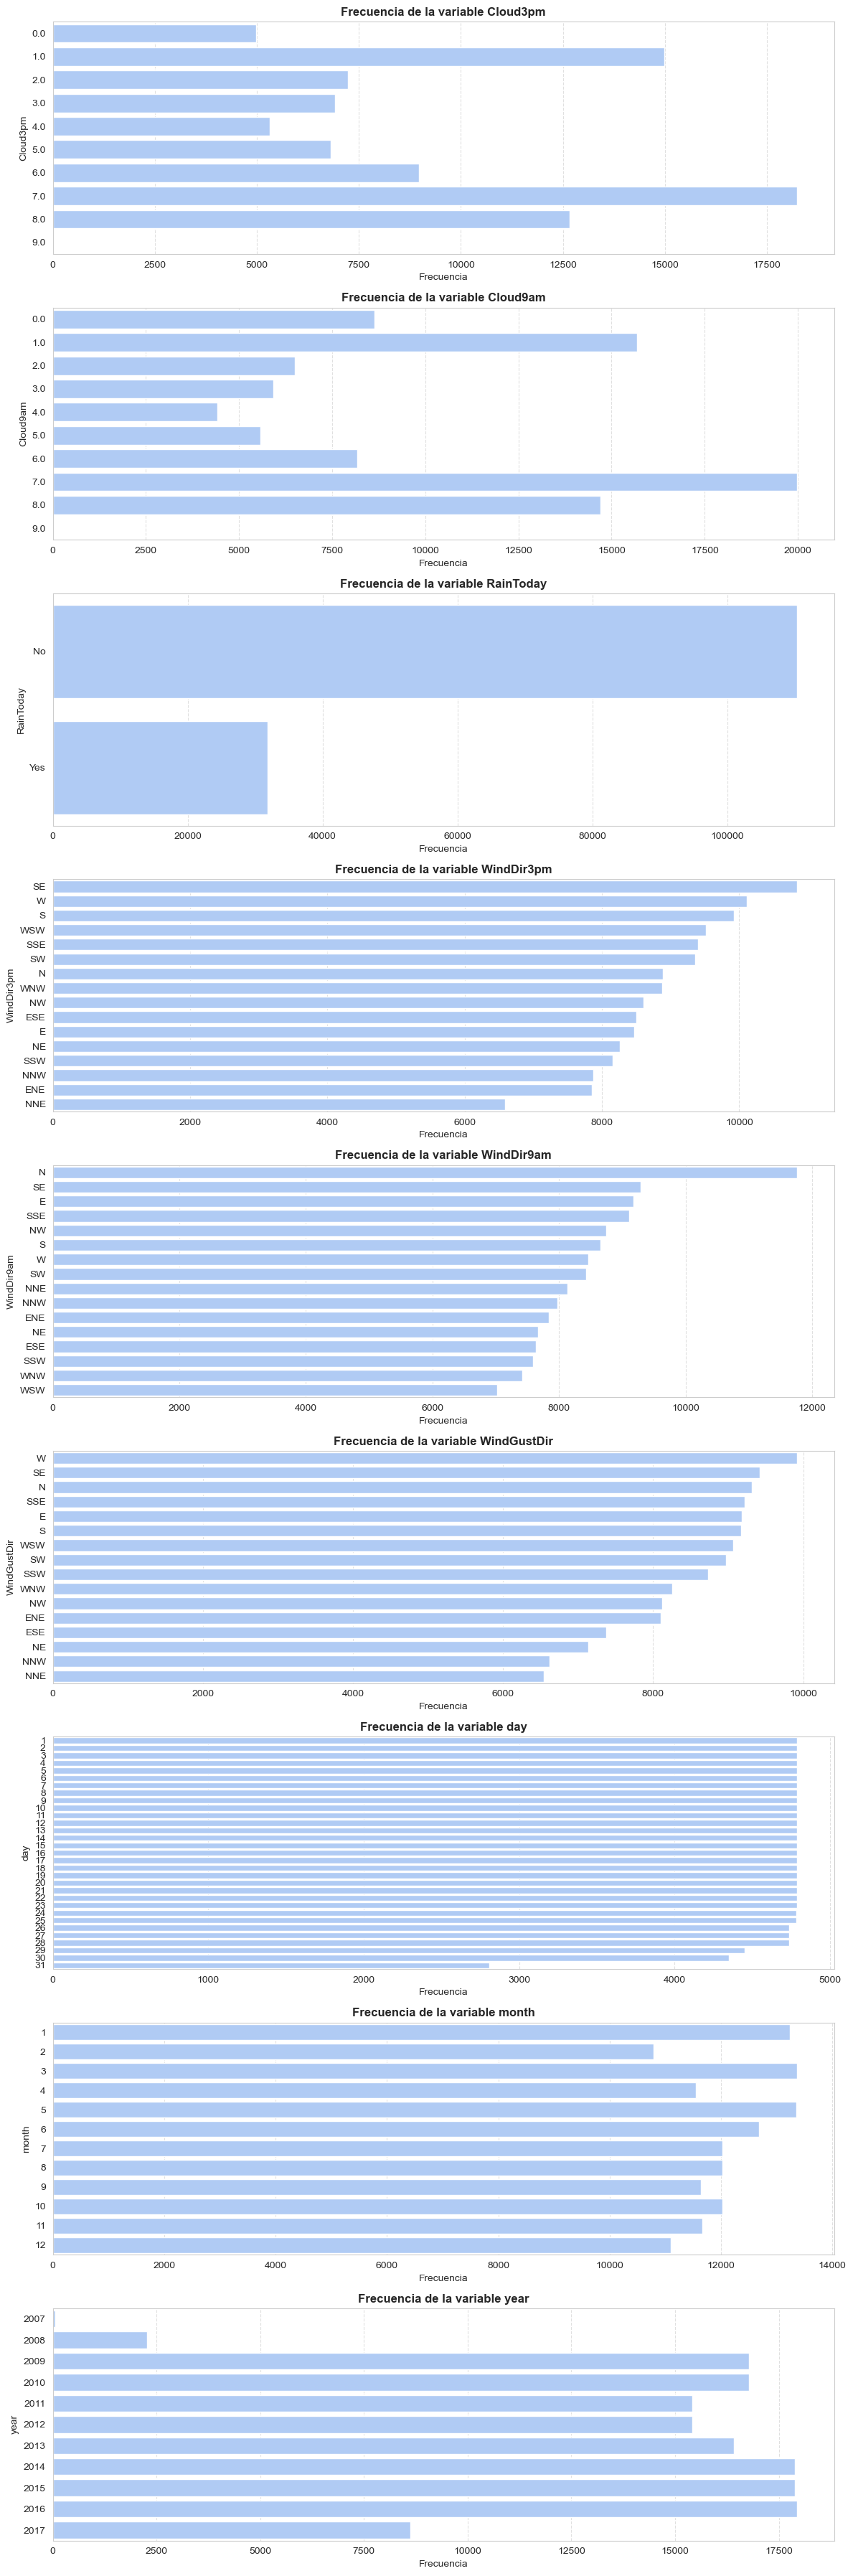

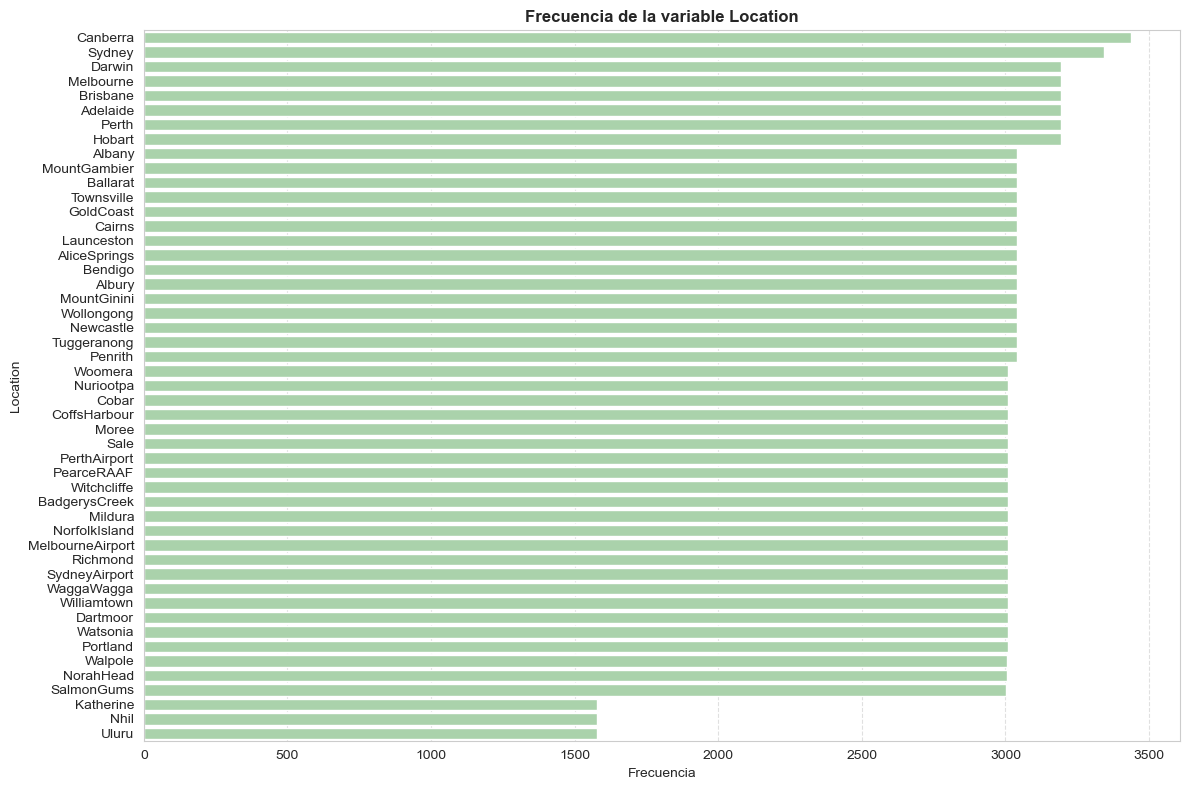

In [87]:
# Filtrar campos categóricos excluyendo "Location" para graficarlos aparte
campos_categoricos_sin_location = [campo for campo in campos_categoricos if campo != "Location"]

# Configurar la figura: ancho fijo, alto proporcional al número de variables
plt.figure(figsize=(12, len(campos_categoricos_sin_location) * 4))

# Graficar cada variable categórica (sin Location)
for i, campo in enumerate(sorted(campos_categoricos_sin_location), 1):
    plt.subplot(len(campos_categoricos_sin_location), 1, i)
    
    # Determinar si la variable es ordinal (para ordenar numéricamente)
    if dfDays[campo].dtype in ['int64', 'float64']:
        orden = sorted(dfDays[campo].dropna().unique())
    else:
        # Si no es numérica, ordenamos por frecuencia
        orden = dfDays[campo].value_counts().index

    sns.countplot(
        y=dfDays[campo],
        order=orden,
        color="#A5C8FF",      # azul pastel
        # edgecolor="black",    # bordes negros para contraste
        # linewidth=1.2
    )
    
    plt.xlabel("Frecuencia", fontsize=10)
    plt.ylabel(campo, fontsize=10)
    plt.title(f"Frecuencia de la variable {campo}", fontsize=12, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()

# Graficar "Location" por separado
plt.figure(figsize=(12, 8))
sns.countplot(
    y=dfDays["Location"],
    order=dfDays["Location"].value_counts().index,
    color="#A3D9A5",     # verde pastel
    # edgecolor="black",
    # linewidth=1.2
)
plt.xlabel("Frecuencia", fontsize=10)
plt.ylabel("Location", fontsize=10)
plt.title("Frecuencia de la variable Location", fontsize=12, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


## Análisis estadístico descriptivo para detección de outliers


In [55]:
# OUTLIERS
# Se muestra un resumen estadístico de todas las variables numéricas del conjunto de datos.
# Este resumen incluye medidas como el conteo, media, desviación estándar.
dfDays.describe()

year          month            day        MinTemp  \
count  145460.000000  145460.000000  145460.000000  143975.000000   
mean     2012.769751       6.399615      15.712258      12.194034   
std         2.537684       3.427262       8.794789       6.398495   
min      2007.000000       1.000000       1.000000      -8.500000   
25%      2011.000000       3.000000       8.000000       7.600000   
50%      2013.000000       6.000000      16.000000      12.000000   
75%      2015.000000       9.000000      23.000000      16.900000   
max      2017.000000      12.000000      31.000000      33.900000   

             MaxTemp       Rainfall   Evaporation      Sunshine  \
count  144199.000000  142199.000000  82670.000000  75625.000000   
mean       23.221348       2.360918      5.468232      7.611178   
std         7.119049       8.478060      4.193704      3.785483   
min        -4.800000       0.000000      0.000000      0.000000   
25%        17.900000       0.000000      2.600000      4.800000   
50%        22.600000       0.000000      4.800000      8.400000   
75%        28.200000       0.800000      7.400000     10.600000   
max        48.100000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  135197.000000  143693.000000  142398.000000  142806.000000   
mean       40.035230      14.043426      18.662657      68.880831   
std        13.607062       8.915375       8.809800      19.029164   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm   Pressure9am    Pressure3pm      Cloud9am      Cloud3pm  \
count  140953.000000  130395.00000  130432.000000  89572.000000  86102.000000   
mean       51.539116    1017.64994    1015.255889      4.447461      4.509930   
std        20.795902       7.10653       7.037414      2.887159      2.720357   
min         0.000000     980.50000     977.100000      0.000000      0.000000   
25%        37.000000    1012.90000    1010.400000      1.000000      2.000000   
50%        52.000000    1017.60000    1015.200000      5.000000      5.000000   
75%        66.000000    1022.40000    1020.000000      7.000000      7.000000   
max       100.000000    1041.00000    1039.600000      9.000000      9.000000   

             Temp9am       Temp3pm  
count  143693.000000  141851.00000  
mean       16.990631      21.68339  
std         6.488753       6.93665  
min        -7.200000      -5.40000  
25%        12.300000      16.60000  
50%        16.700000      21.10000  
75%        21.600000      26.40000  
max        40.200000      46.70000

 ## Análisis visual de posibles valores atípicos (outliers)

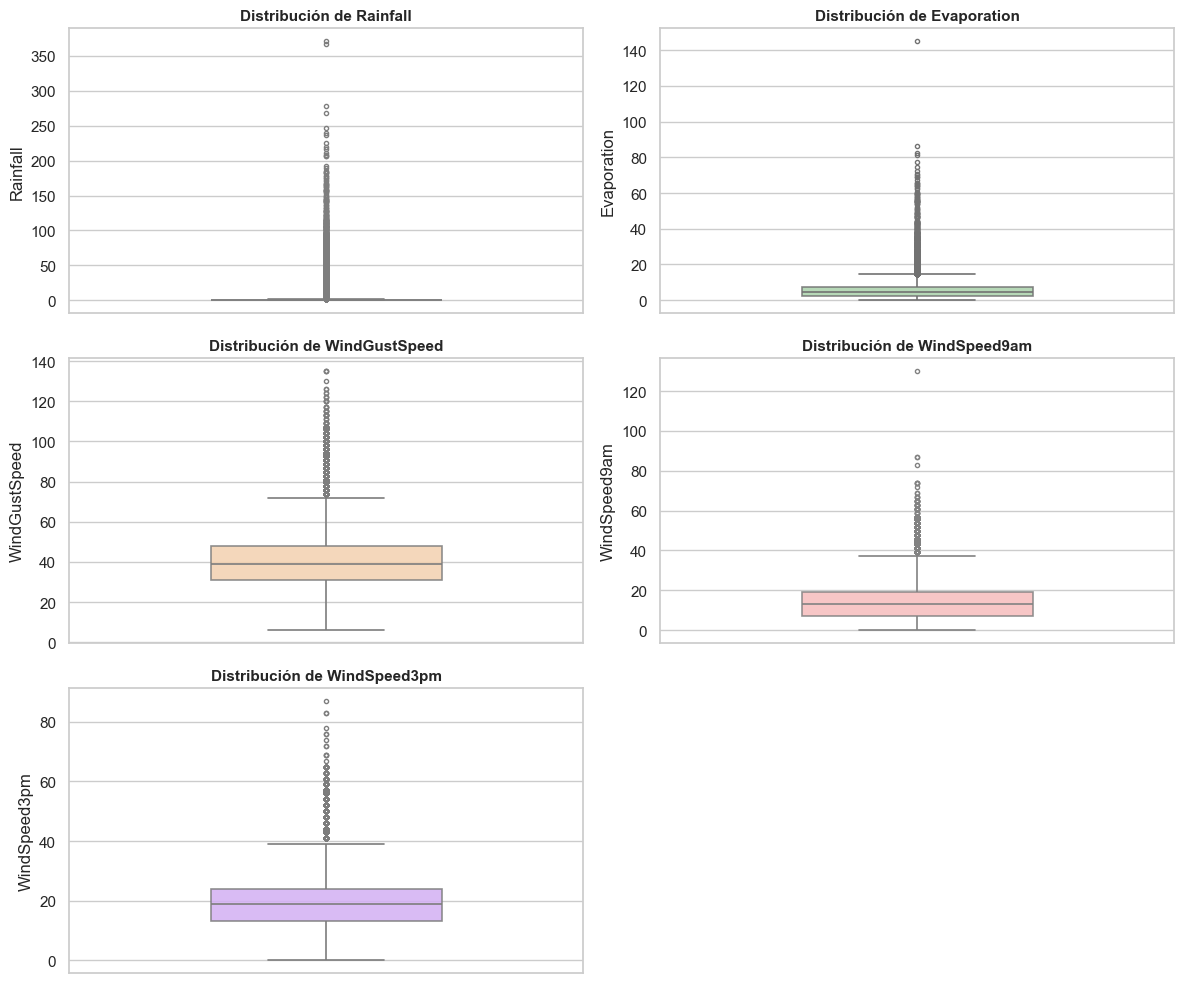

In [88]:
# ------------------------------------------------------------
# Análisis visual de valores atípicos (outliers)
# mediante boxplots de variables numéricas seleccionadas
# ------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo visual general
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 10))

# Variables numéricas que se analizarán
variables = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

# Paleta de colores suaves (pasteles)
colores = ["#A5C8FF", "#A3D9A5", "#FFD1A3", "#FFB3B3", "#D3A3FF"]

# Crear un boxplot por cada variable
for i, (var, color) in enumerate(zip(variables, colores), 1):
    plt.subplot(3, 2, i)  # cuadrícula flexible 3x2 (una casilla quedará vacía)
    
    sns.boxplot(
        y=dfweatherAUS[var],
        color=color,
        width=0.45,
        fliersize=3,   # tamaño de los puntos de outliers
        linewidth=1.2, # grosor de los bordes
        boxprops=dict(alpha=0.85)  # transparencia del boxplot
    )
    
    # Títulos y etiquetas
    plt.title(f"Distribución de {var}", fontsize=11, fontweight='bold')
    plt.ylabel(var)
    plt.xlabel("")  # sin etiqueta de eje X para mantener limpio el diseño

# Ajuste del diseño general para evitar solapamientos
plt.tight_layout()

# Mostrar la figura final
plt.show()


##  Distribucion de los outilers encontrados.
### Resultado : estan sesgados

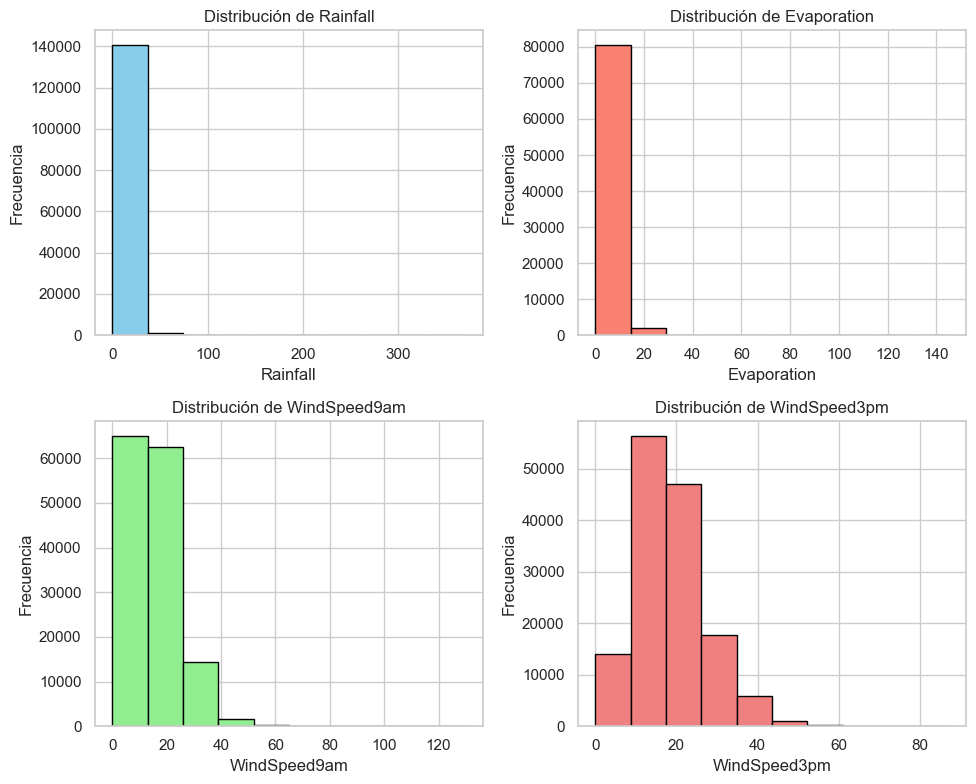

In [89]:
#ver Distribucion de los outilers encontrados
# Resultado : estan sesgados

# Se importa la librería para graficar
import matplotlib.pyplot as plt

# Configuración general del tamaño de la figura
plt.figure(figsize=(10, 8))

# --- Histograma de la variable Rainfall ---
# Crea el primer subplot (2 filas, 2 columnas, posición 1)
plt.subplot(2, 2, 1)
graf1 = dfweatherAUS['Rainfall'].hist(bins=10, color='skyblue', edgecolor='black')
graf1.set_xlabel('Rainfall')
graf1.set_ylabel('Frecuencia')
graf1.set_title('Distribución de Rainfall')

# --- Histograma de la variable Evaporation ---
plt.subplot(2, 2, 2)
graf2 = dfweatherAUS['Evaporation'].hist(bins=10, color='salmon', edgecolor='black')
graf2.set_xlabel('Evaporation')
graf2.set_ylabel('Frecuencia')
graf2.set_title('Distribución de Evaporation')

# --- Histograma de la variable WindSpeed9am ---
plt.subplot(2, 2, 3)
graf3 = dfweatherAUS['WindSpeed9am'].hist(bins=10, color='lightgreen', edgecolor='black')
graf3.set_xlabel('WindSpeed9am')
graf3.set_ylabel('Frecuencia')
graf3.set_title('Distribución de WindSpeed9am')

# --- Histograma de la variable WindSpeed3pm ---
plt.subplot(2, 2, 4)
graf4 = dfweatherAUS['WindSpeed3pm'].hist(bins=10, color='lightcoral', edgecolor='black')
graf4.set_xlabel('WindSpeed3pm')
graf4.set_ylabel('Frecuencia')
graf4.set_title('Distribución de WindSpeed3pm')

# Ajuste de espacios para evitar que los gráficos se solapen
plt.tight_layout()
plt.show()


En el análisis de valores atípicos mediante boxplots, se incluyó WindGustSpeed junto con las demás variables para comparar la presencia de outliers.
No obstante, debido a su rango y sesgo pronunciado, se presenta de manera separada en el análisis de distribuciones mediante histogramas.

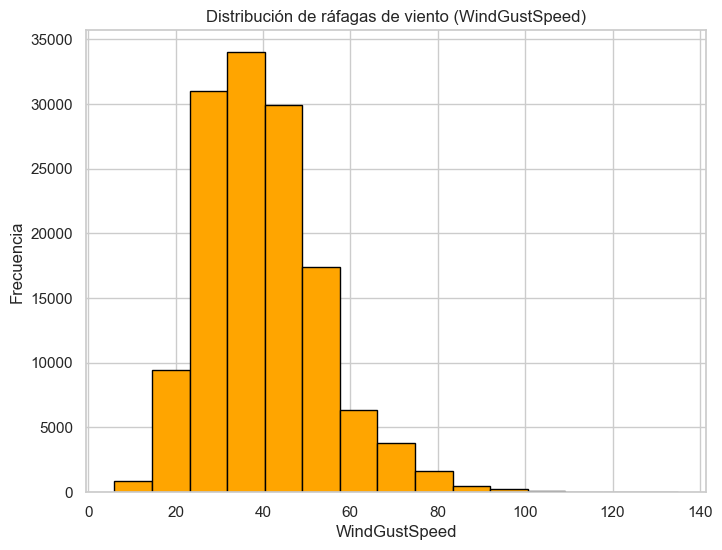

In [96]:
# Distribución y valores atípicos de WindGustSpeed
plt.figure(figsize=(8,6))
dfweatherAUS['WindGustSpeed'].hist(bins=15, color='orange', edgecolor='black')
plt.xlabel('WindGustSpeed')
plt.ylabel('Frecuencia')
plt.title('Distribución de ráfagas de viento (WindGustSpeed)')
plt.show()


# Detección de Valores Atípicos en Variables Numéricas mediante Rango Intercuartílico (IQR)

In [97]:
# Análisis de asimetría (sesgo): se aplicará el rango intercuartílico (IQR)
# para detectar valores atípicos (outliers) en las variables numéricas seleccionadas.

# Lista de columnas a evaluar
variables = ["Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Evaporation"]

# Diccionario para almacenar los límites de outliers de cada variable
limites_outliers = {}

# Cálculo del IQR y de los límites inferior y superior para cada variable
for var in variables:
    # Cálculo del rango intercuartílico (IQR)
    q1 = dfweatherAUS[var].quantile(0.25)   # Primer cuartil (25%)
    q3 = dfweatherAUS[var].quantile(0.75)   # Tercer cuartil (75%)
    iqr = q3 - q1                           # Rango intercuartílico
    
    # Cálculo de los límites para detectar outliers
    limite_inferior = q1 - (iqr * 3)
    limite_superior = q3 + (iqr * 3)
    
    # Almacenar los resultados en el diccionario
    limites_outliers[var] = {
        "IQR": iqr,
        "Límite inferior": limite_inferior,
        "Límite superior": limite_superior
    }

# Convertir los resultados en un DataFrame para visualización
outliers_df = pd.DataFrame(limites_outliers).T

# Mostrar los límites calculados
print(outliers_df)


                IQR  Límite inferior  Límite superior
Rainfall        0.8             -2.4              3.2
WindGustSpeed  17.0            -20.0             99.0
WindSpeed9am   12.0            -29.0             55.0
WindSpeed3pm   11.0            -20.0             57.0
Evaporation     4.8            -11.8             21.8


# Detección de Valores Fuera de Rango en Variables de Nubosidad

En esta sección se realiza una verificación de calidad de datos para las columnas **Cloud9am** y **Cloud3pm**, 
las cuales representan la cantidad de cobertura nubosa en una escala de **0 a 8 octas**.  
Se identifica cuántos registros presentan valores que se encuentran fuera del rango permitido.


In [111]:
# ==============================================================
#   Verificación de valores fuera del rango permitido (0 a 8)
#   en las variables de nubosidad matutina y vespertina
# ==============================================================

#  Almacenar el conteo de valores inválidos
valores_fuera_rango = {
    "Cloud9am": ((dfDays["Cloud9am"] < 0) | (dfDays["Cloud9am"] > 8)).sum(),
    "Cloud3pm": ((dfDays["Cloud3pm"] < 0) | (dfDays["Cloud3pm"] > 8)).sum()
}


# Creamos una estructura de datos con el conteo de valores fuera de rango
df_fuera_rango = (
    pd.DataFrame.from_dict(valores_fuera_rango, orient="index", columns=["Valores Fuera de Rango"])
    .reset_index()
    .rename(columns={"index": "Variable"})
)

# Mostramos la tabla resultante
print(" Conteo de valores fuera de rango en variables de nubosidad:\n")
print(df_fuera_rango)


 Conteo de valores fuera de rango en variables de nubosidad:

   Variable  Valores Fuera de Rango
0  Cloud9am                       2
1  Cloud3pm                       1


#  Detección de Valores Atípicos (Outliers) en Variables Numéricas

En este análisis se identifican valores que se encuentran **fuera de los límites esperados** en las variables numéricas 
relacionadas con lluvia, viento y evaporación.  
El objetivo es conocer cuántos registros presentan **valores atípicos** y el **porcentaje que representan** sobre el total de datos.


In [112]:
# ==============================================================
#   Detección y cuantificación de valores atípicos (outliers)
#   en variables numéricas meteorológicas
# ==============================================================

# Definimos una estructura que contiene el conteo de valores fuera del rango aceptable
valores_atipicos = {
    "Rainfall": ((dfDays["Rainfall"] < -2.4) | (dfDays["Rainfall"] > 3.2)).sum(),
    "WindGustSpeed": ((dfDays["WindGustSpeed"] < -20) | (dfDays["WindGustSpeed"] > 99)).sum(),
    "WindSpeed9am": ((dfDays["WindSpeed9am"] < -29) | (dfDays["WindSpeed9am"] > 55)).sum(),
    "WindSpeed3pm": ((dfDays["WindSpeed3pm"] < -20) | (dfDays["WindSpeed3pm"] > 57)).sum(),
    "Evaporation": ((dfDays["Evaporation"] < -11.8) | (dfDays["Evaporation"] > 21.8)).sum()
}

# Calculamos el total de registros del DataFrame
total_registros = len(dfDays)

# Obtenemos el porcentaje de valores atípicos por variable
porcentaje_atipicos = {
    columna: round((conteo / total_registros) * 100, 2)
    for columna, conteo in valores_atipicos.items()
}

# Construimos un DataFrame que resume los resultados
df_outliers = pd.DataFrame({
    "Variable": valores_atipicos.keys(),
    "Valores Fuera de Rango": valores_atipicos.values(),
    "Porcentaje (%)": porcentaje_atipicos.values()
})

# Mostramos los resultados
print(" Resumen de valores atípicos por variable numérica:\n")
print(df_outliers)


 Resumen de valores atípicos por variable numérica:

        Variable  Valores Fuera de Rango  Porcentaje (%)
0       Rainfall                   20762           14.27
1  WindGustSpeed                     153            0.11
2   WindSpeed9am                     114            0.08
3   WindSpeed3pm                      82            0.06
4    Evaporation                     481            0.33


# Análisis de Valores Faltantes en la Variable Objetivo


In [101]:
# Mostrar el porcentaje de datos faltantes específicamente para la variable objetivo
print("Porcentaje de valores nulos en la variable objetivo")

# Filtrar el DataFrame de datos faltantes para incluir solo la columna(s) objetivo
datos_faltantes_objetivo = missing_data_df[
    missing_data_df["Columna"].str.strip().isin(variable_objetivo)
]

# Imprimir los resultados filtrados
print(datos_faltantes_objetivo)


Porcentaje de valores nulos en la variable objetivo
         Columna  Valores NaN  Porcentaje NaN
25  RainTomorrow         3267            2.25


In [102]:
# Generar estadísticas descriptivas para la(s) columna(s) objetivo
# Calcularemos la moda y la cantidad de registros no nulos por columna

estadisticas_objetivo = {
    "Columna": variable_objetivo,
    "Moda": [
        # Tomar la moda de la columna si existe, sino asignar "N/A"
        dfDays[col].mode().iloc[0] if not dfDays[col].mode().empty else "N/A" 
        for col in variable_objetivo
    ],
    "Registros_no_nulos": [
        # Contar los valores no nulos de la columna, o "N/A" si la columna no existe
        dfDays[col].count() if col in dfDays.columns else "N/A" 
        for col in variable_objetivo
    ]
}

# Convertir el diccionario en DataFrame para facilitar la visualización
df_estadisticas_objetivo = pd.DataFrame(estadisticas_objetivo)

# Mostrar las estadísticas calculadas
print("Resumen de estadísticas de la(s) variable(s) objetivo")
print(df_estadisticas_objetivo)


Resumen de estadísticas de la(s) variable(s) objetivo
        Columna Moda  Registros_no_nulos
0  RainTomorrow   No              142193


# Distribución de Frecuencia de la Variable Objetivo

In [103]:
# Analizar la distribución de la variable objetivo
# Calculamos la frecuencia absoluta y relativa de cada valor único

for columna_objetivo in variable_objetivo:

    # Porcentaje de ocurrencias de cada valor único
    porcentaje_valores = dfDays[columna_objetivo].value_counts(normalize=True) * 100
    
    # Crear un DataFrame con los valores únicos, su frecuencia y porcentaje
    distribucion = pd.DataFrame({
        "Valor": porcentaje_valores.index,
        "Frecuencia Absoluta": dfDays[columna_objetivo].value_counts().values,
        "Porcentaje (%)": porcentaje_valores.values.round(2)
    })
    
    # Mostrar la distribución de la columna actual
    print(f"\nDistribución de la columna '{columna_objetivo}':")
    
    display(distribucion)



Distribución de la columna 'RainTomorrow':


Valor  Frecuencia Absoluta  Porcentaje (%)
0    No               110316           77.58
1   Yes                31877           22.42

# Visualización de la Distribución de RainTomorrow


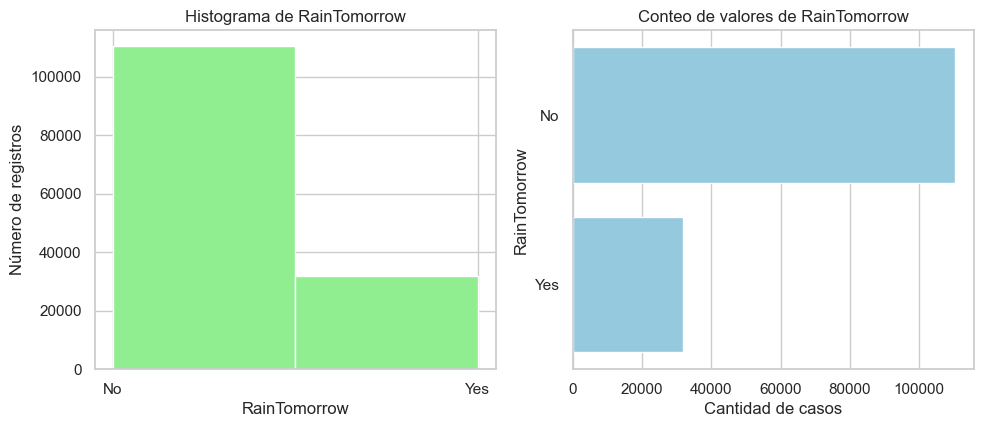

In [104]:
# Visualización de la distribución de la variable 'RainTomorrow'  
# Usamos histogramas y gráficos de conteo para observar la frecuencia de sus valores

plt.figure(figsize=(10, 8))

# Primer gráfico: Histograma simple
plt.subplot(2, 2, 1)
hist_rain = dfweatherAUS["RainTomorrow"].hist(bins=2, color="lightgreen")
hist_rain.set_xlabel("RainTomorrow")
hist_rain.set_ylabel("Número de registros")
plt.title("Histograma de RainTomorrow")

# Segundo gráfico: Conteo con Seaborn
plt.subplot(2, 2, 2)
sns.countplot(
    y=dfDays[dfDays["RainTomorrow"].notna()]["RainTomorrow"], 
    order=["No", "Yes"], 
    color="skyblue"
)
plt.xlabel("Cantidad de casos")
plt.ylabel("RainTomorrow")
plt.title("Conteo de valores de RainTomorrow")

plt.tight_layout()
plt.show()


# Análisis Visual de Variables Numéricas vs RainTomorrow

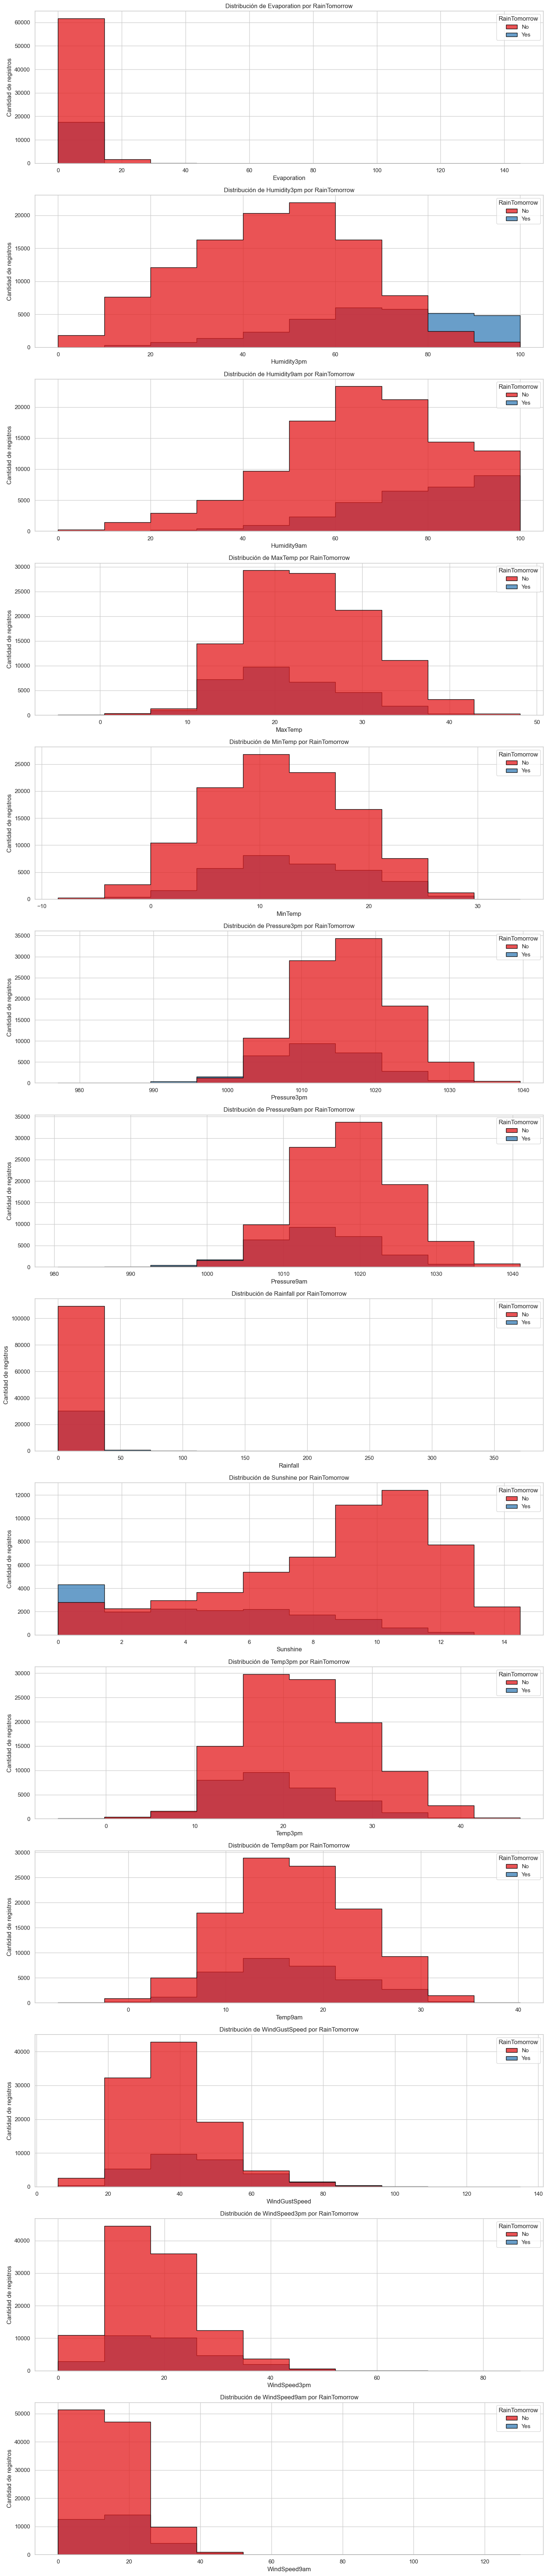

In [107]:
# Visualización de cómo se distribuyen las variables numéricas según la variable objetivo
# Usamos histogramas diferenciando por 'RainTomorrow' para observar patrones con colores más contrastantes

plt.figure(figsize=(15, len(campos_numericos) * 5))

for idx, columna_num in enumerate(sorted(campos_numericos), 1):
    plt.subplot(len(campos_numericos), 1, idx)
    
    # Histograma de cada variable numérica, coloreado según la variable objetivo
    sns.histplot(
        data=dfDays[dfDays[columna_num].notna()],
        x=columna_num,
        hue="RainTomorrow",
        bins=10,
        element="step",       # estilo de línea
        edgecolor="black",
        alpha=0.75,           # transparencia
        palette="Set1"        # colores más diferenciados para las categorías
    )
    
    plt.xlabel(columna_num)
    plt.ylabel("Cantidad de registros")
    plt.title(f"Distribución de {columna_num} por RainTomorrow")

plt.tight_layout()
plt.show()


# Análisis de Distribución de Variables Categóricas Según la Variable Objetivo *RainTomorrow*

En este apartado se analiza cómo se distribuyen las distintas variables categóricas del conjunto de datos 
con respecto a la variable objetivo **RainTomorrow**, que indica si lloverá o no al día siguiente.  
Se presentan gráficos de barras para cada variable categórica, así como un análisis separado para *Location*.


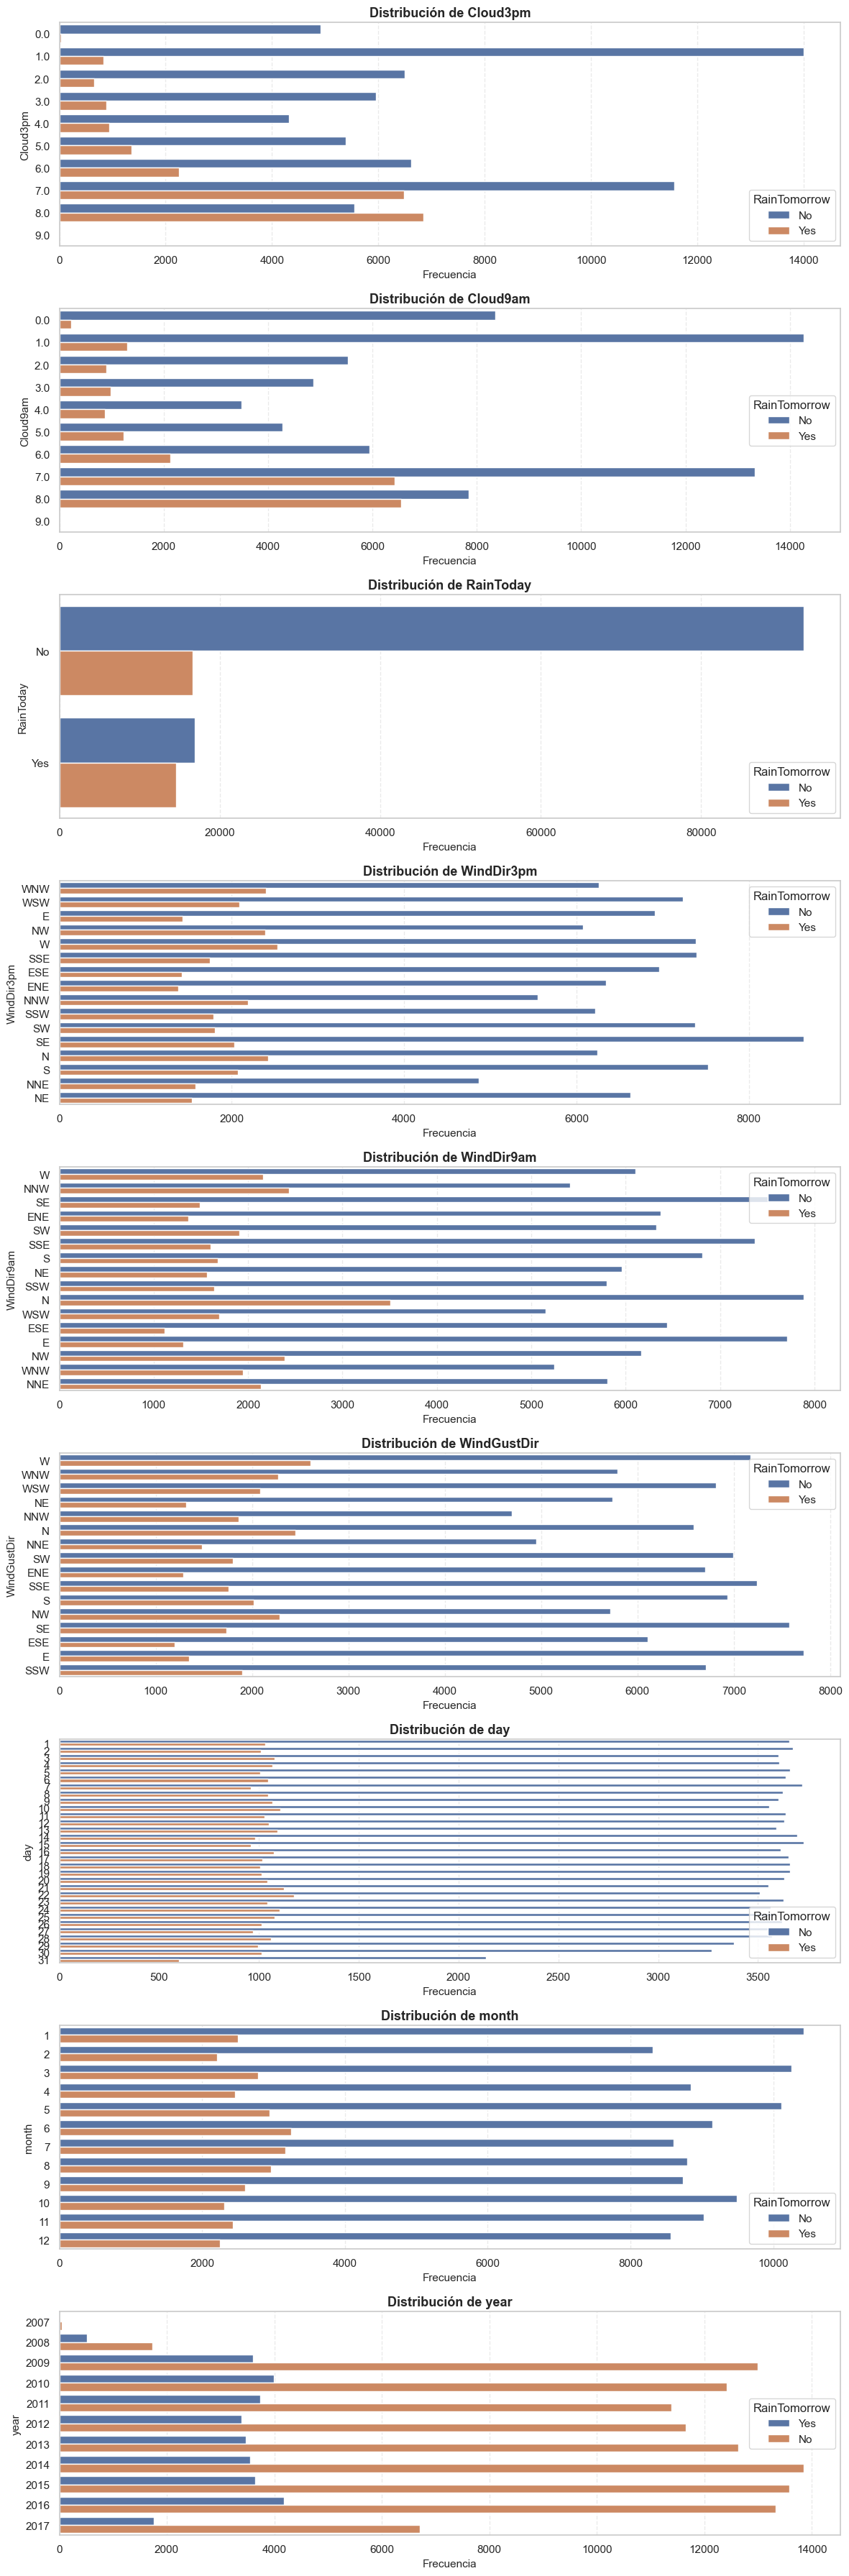

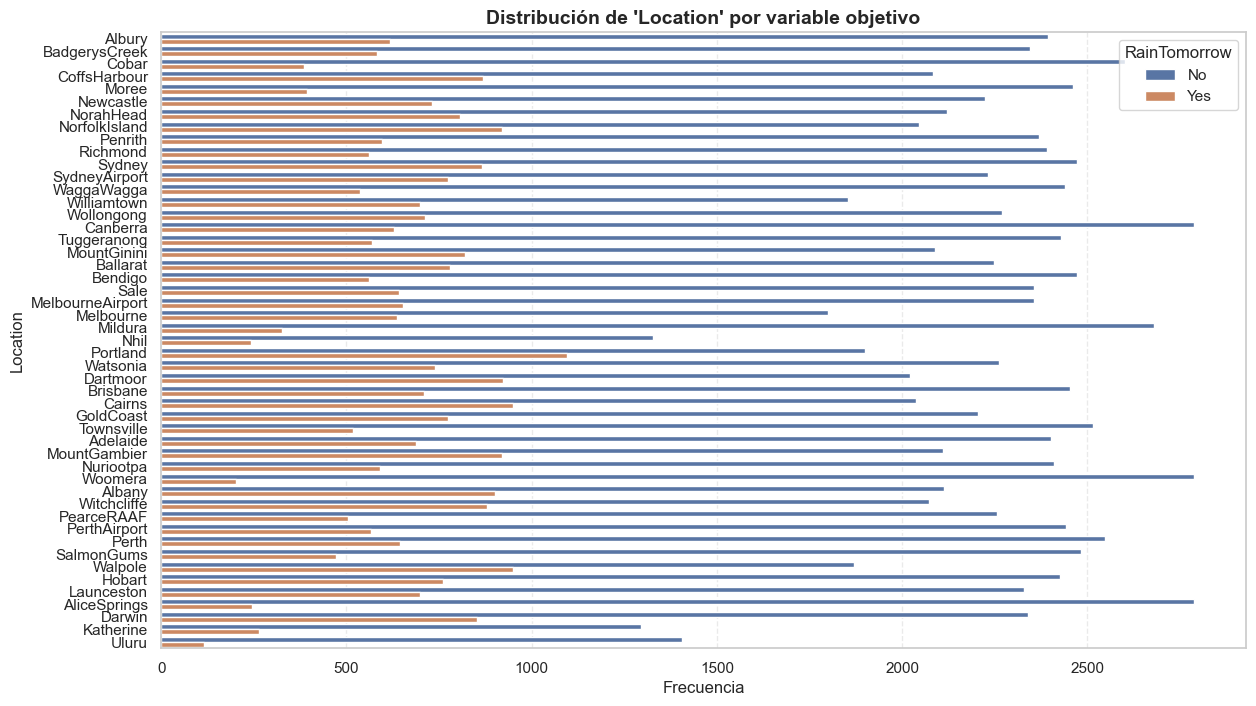

In [110]:
# ==============================================================
#   Análisis de distribución de variables categóricas 
#   respecto a la variable objetivo "RainTomorrow"
# ==============================================================

# Filtramos las variables categóricas, excluyendo "Location" 
# ya que se graficará de manera independiente
campos_categoricos_filtrados = [
    col for col in campos_categoricos if col != "Location"
]


colores_vivos = "deep"

# Figura general
plt.figure(figsize=(12, len(campos_categoricos_filtrados) * 4))

# Recorremos cada variable categórica para graficarla
for i, columna in enumerate(sorted(campos_categoricos_filtrados), 1):
    plt.subplot(len(campos_categoricos_filtrados), 1, i)
    sns.countplot(
        y=dfDays[columna],
        hue=dfDays["RainTomorrow"],
        palette=colores_vivos,
        edgecolor=None   
    )
    plt.xlabel("Frecuencia", fontsize=11)
    plt.ylabel(columna, fontsize=11)
    plt.title(f"Distribución de {columna}", fontsize=13, fontweight="bold")
    plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()

# ==============================================================
#   Gráfico especial para la variable "Location"
# ==============================================================

plt.figure(figsize=(14, 8))
sns.countplot(
    y=dfDays["Location"],
    hue=dfDays["RainTomorrow"],
    palette=colores_vivos,
    edgecolor=None   
)
plt.xlabel("Frecuencia", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.title("Distribución de 'Location' por variable objetivo", fontsize=14, fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()
